In [1]:
regression = 1
i_m_g = 1
channels = 1
cycle = 0
fft_ = 1
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm_notebook
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import matplotlib.pyplot as plt
import torch
# Neural networks can be constructed using the torch.nn package.
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.sampler import SequentialSampler, SubsetRandomSampler
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim
import pickle 


import scipy.io as sio
from scipy.io import loadmat, savemat
from scipy.stats.stats import pearsonr 
from scipy.stats import spearmanr

for dirname, _, filenames in os.walk('/kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import gc

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, clear_output, FileLinks

/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/input/geekyfile-frame/geekyfile
/kaggle/input/geekyfile-frame/geekyfile_numpy
/kaggle/input/btprw/sub_job_a_thon.csv
/kaggle/input/btprw/test_YCcRUnU.csv
/kaggle/input/btprw/train_Df64byy.csv
/kaggle/input/variations/geekyfile_gha cnnlstm_version 12
/kaggle/input/variations/geekyfile_try cnnlstm version 5
/kaggle/input/variations/geekyfile_fork_rus gha cnnlstm version 2
/kaggle/input/variations/geekyfile_try cnnlstm version 2
/kaggle/input/variations/geekyfile_cnnlstm_version 27
/kaggle/input/variations/geekyfile_fork_try cnnlstm version 4
/kaggle/input/variations/geekyfile_try cnnlstm version 3
/kaggle/input/variations/geekyfile_gha cnnlstm_version 10
/kaggle/input/variations/geekyfile_fork_of_cnnlstm_version 4
/kaggle/input/variations/geekyfile_fork_try cnnlstm version 5
/kaggle/input/variations/geekyfile_fork_gha cnnlstm_version 7
/kaggle/input/variations/geekyfile_rus gha cnnlstm version 3
/kaggle/input/variations/geekyfile

In [2]:
# with open('/kaggle/input/geekyfile-frame/geekyfile', 'rb') as f:
#     prediction_dataset = pickle.load(f)
# for i in range(1, len(prediction_dataset)+1):
#     target = prediction_dataset[i]['target'].apply(lambda x : x.data.cpu().numpy())
#     pred = prediction_dataset[i]['preds'].apply(lambda x : x.data.cpu().numpy())
#     print(i, pearsonr(target, pred)[0], spearmanr(target, pred)[0])

In [3]:
with open('/kaggle/input/geekyfile-frame/geekyfile_numpy', 'rb') as f:
    prediction_dataset = pickle.load(f)

In [4]:
for i in range(1, len(prediction_dataset)+1):
    target = prediction_dataset[i]['target']
    pred = prediction_dataset[i]['preds']

    print(i, pearsonr(target, pred)[0], spearmanr(target, pred)[0])

1 -0.207564817178542 -0.19911600415302966
2 -0.3305283535225915 -0.2683967322655285
3 -0.3789746784447584 -0.3439934475109786
4 0.23354050740250465 0.3469178430005756
5 -0.1945496914166125 -0.09817276252951826
6 -0.22194910522710767 -0.021885222987945936
7 0.26438488467837856 0.3665619569304474
8 0.4079548700928318 0.42537234762816545
9 0.4927368066888248 0.3874001332834931
10 0.21427391290326367 0.3882514646161461
11 0.41028652793213966 0.3801666376414763
12 0.3561105853908584 0.38837236934643926
13 0.3281562444429248 0.3735393995873021
14 0.5126111921752701 0.5352002929905004
15 0.6094814765265968 0.5274969582262432
16 0.3246986867609358 0.3726703964852253
17 0.4315303784083979 0.4332554701711461
18 0.36032276506928046 0.3834389309919618
19 0.45203637112865286 0.4384404815433892
20 0.47823482433367304 0.5428504840343341
21 0.6272949280963181 0.5370721323158454
22 0.5061563250077062 0.5197959717236831
23 0.32310594894935935 0.3994288622343104
24 0.4913603674355703 0.47674413189767223


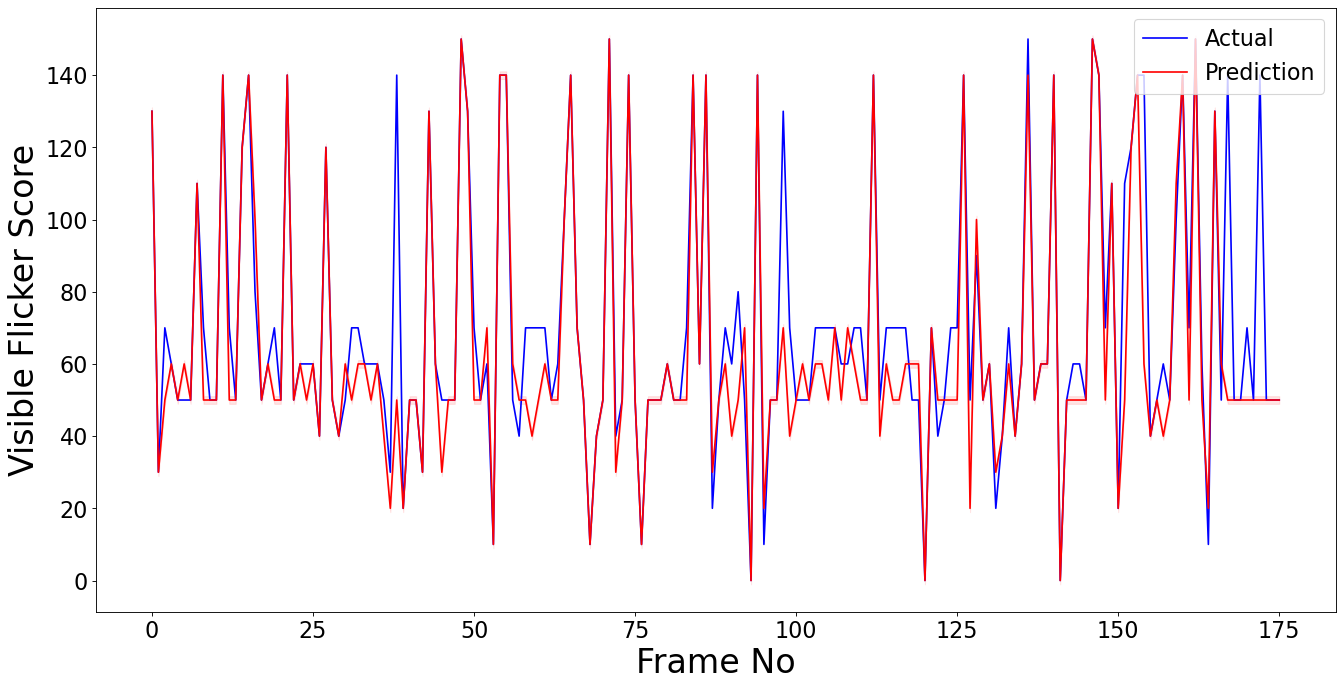

In [5]:
x = range(len(pred))
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'xtick.labelsize': 20})
plt.rcParams.update({'ytick.labelsize': 20})


fig, ax = plt.subplots(figsize=(20, 10), dpi=80)
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)

plt.xlabel("Frame No")
plt.ylabel("Visible Flicker Score")


# conf interval
ci = 1.90 * np.std(pred)/np.mean(pred)

ax.plot(x,target, 'b', label='Actual')
ax.plot(x,pred, 'r', label='Prediction')
ax.fill_between(x, (pred-ci), (pred+ci), color='r', alpha=.1)
ax.legend(loc='upper right', fontsize=20)

fig.savefig('flicker.png', dpi=100)

In [6]:
dictionary = {'geek': 1, 'supergeek': True, 4: 'geeky'} 
  
try: 
    geeky_file = open('geekyfile', 'wb') 
    pickle.dump(prediction_dataset, geeky_file) 
    geeky_file.close() 

except: 
    print("Something went wrong")
    
with open('geekyfile', 'rb') as f:
    x = pickle.load(f)

# BTP 2 NLFX

In [7]:
base_path_nflx = '../input/variations/'
pred_file_paths = os.listdir(base_path_nflx)


In [8]:
high = 0
plcc = 0
srocc = 0
t = ''
p = ''

for path_ in os.listdir(base_path_nflx):
    path = os.path.join(base_path_nflx, path_)
    with open(path, 'rb') as f:
        prediction_dataset = pickle.load(f)

    for i in range(1, len(prediction_dataset)+1):
        target = prediction_dataset[i]['target']
        pred = prediction_dataset[i]['preds']

        print(i, pearsonr(target, pred)[0], spearmanr(target, pred)[0])
        if  pearsonr(target, pred)[0]+ spearmanr(target, pred)[0] > high:
            high =  pearsonr(target, pred)[0] + spearmanr(target, pred)[0]
            plcc = pearsonr(target, pred)[0]
            srocc = spearmanr(target, pred)[0]
            t = target
            p = pred

1 -0.4586411295754316 -0.32784258063709987
2 -0.5131820140505468 -0.40337000197242057
3 -0.4823219817375903 -0.3782781396555029
4 -0.4895558878827647 -0.390068567660259
5 -0.4706183860985012 -0.3679758239231918
6 -0.5340484129503905 -0.43159834707895306
7 -0.5632226266496524 -0.4541489715152339
8 -0.5836799298120381 -0.469716915288504
9 -0.5881631429076557 -0.47184606053984834
10 -0.623709991316342 -0.5192367129084794
11 -0.6343310593212467 -0.5260362412918048
12 -0.618552346717232 -0.5193282890483222
13 -0.5929543814419265 -0.4859029980057128
14 -0.580135212522604 -0.4691674584494475
15 -0.5744338897993254 -0.47015190195275725
16 -0.5995165457047962 -0.501905928443236
17 -0.6333050024356951 -0.5274327774244069
18 -0.6226130401941292 -0.522006891138723
19 -0.6707097368728221 -0.5916734395241068
20 -0.6429738915899322 -0.5584770888311043
21 -0.6483775676355626 -0.5646584782704911
22 -0.6437440984116453 -0.5590265456701609
23 -0.6549127148444528 -0.5787154157363555
24 -0.6687226632749805

In [9]:
plcc

0.8275044559901059

In [10]:
srocc

0.79800853485064

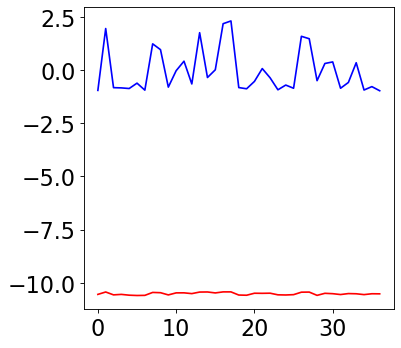

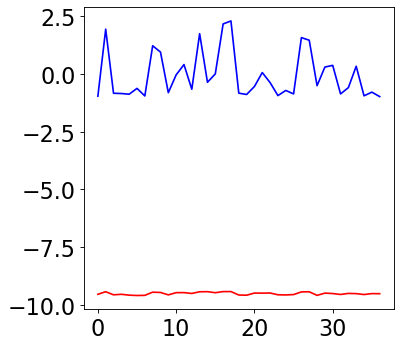

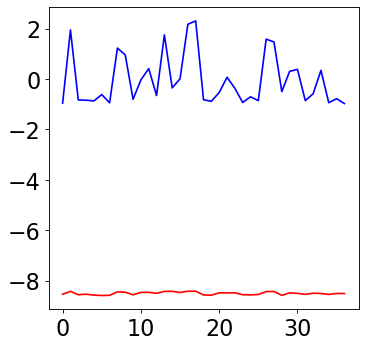

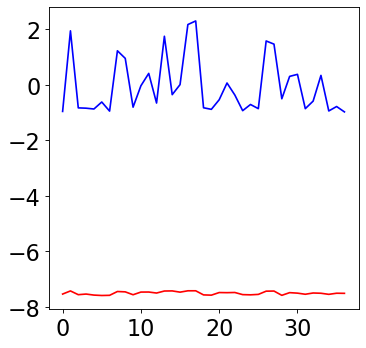

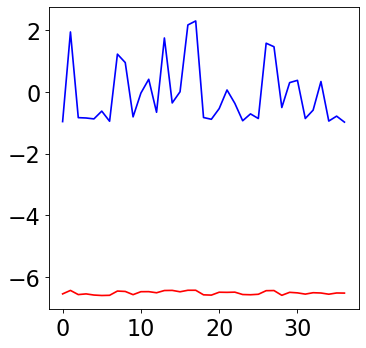

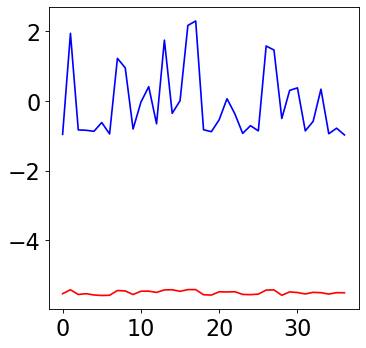

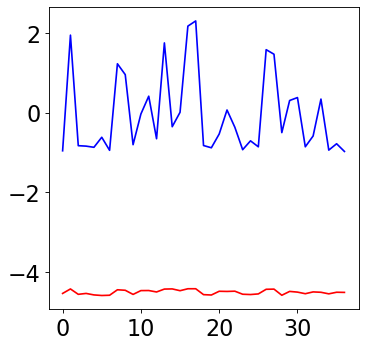

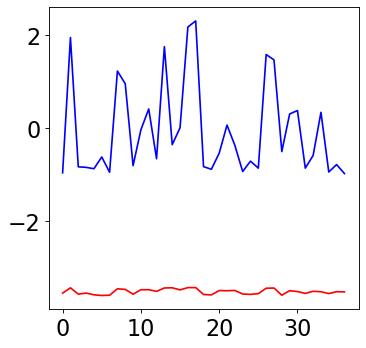

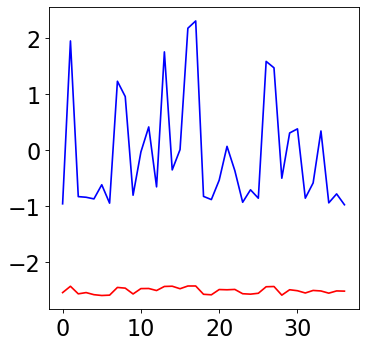

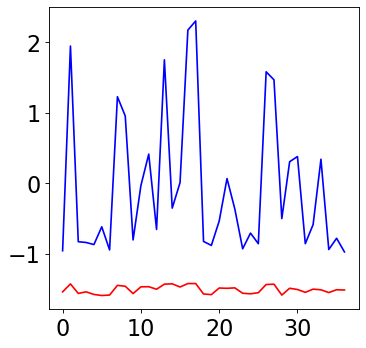

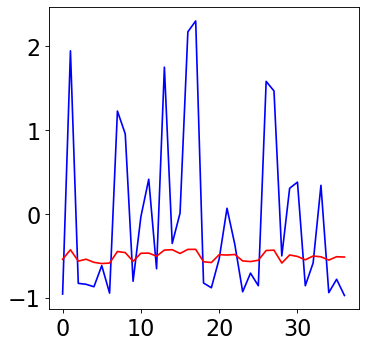

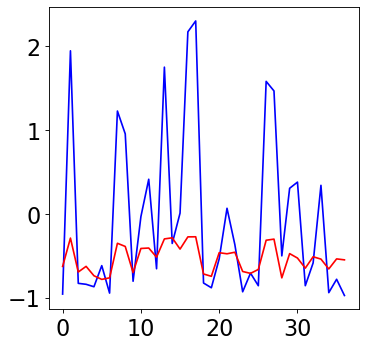

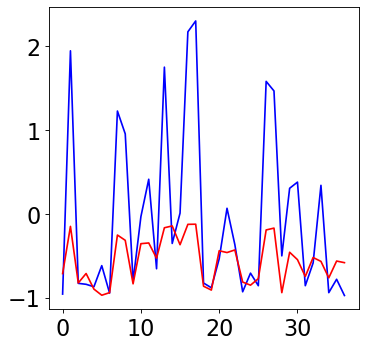

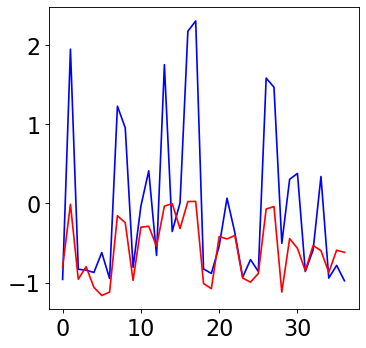

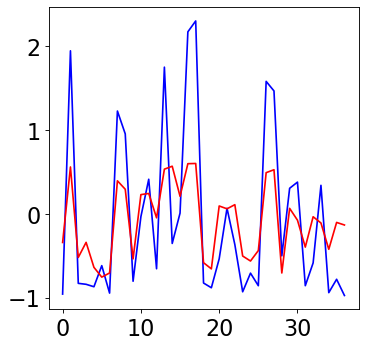

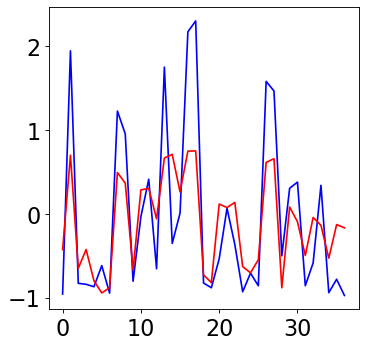

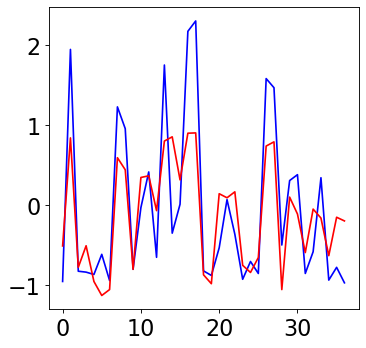

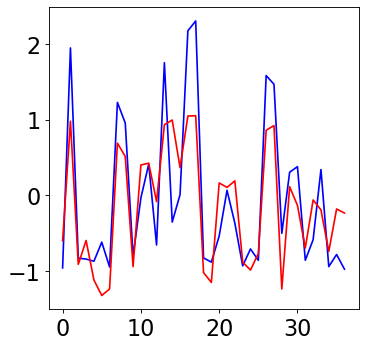

In [11]:
# target, pred = t, p
def plot(target, pred):
    x = range(len(pred))
#     plt.rcParams.update({'font.size': 20})
#     plt.rcParams.update({'xtick.labelsize': 20})
#     plt.rcParams.update({'ytick.labelsize': 20})


    fig, ax = plt.subplots(figsize=(5, 5), dpi=80)
#     ax.xaxis.label.set_size(30)
#     ax.yaxis.label.set_size(30)

#     plt.xlabel("Frame No")
#     plt.ylabel("QoE")


    # conf interval
#     ci = 1.90 * np.std(pred)/np.mean(pred)

    ax.plot(x,target, 'b', label='Actual')
    ax.plot(x,pred, 'r', label='Prediction')
#     ax.fill_between(x, (pred-ci), (pred+ci), color='r', alpha=.1)
#     ax.legend(loc='upper right', fontsize=20)

#     fig.savefig('nflx qoe.png', dpi=100)
#     display(fig)
    

from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse  = 1e100
for j in range(1, 100):
    for i in range(-10, 10):
        t_ = t
        p_ = p*j+i
        if rmse > mean_absolute_error(t_, p_):
            rmse = mean_absolute_error(t_, p_)
            target = t_
            pred = p_
            m = j
            a = i
            plot(t_, p_)

In [12]:
m, a

(14, 7)

In [13]:
# target, pred = t, p
def plot_ci_shift(target_, pred_):
    target_ = np.array(target_)
    pred_ = np.array(pred_)
#     target = target_ + 5
#     pred = pred_ + 5
    x = range(len(pred))
    plt.rcParams.update({'font.size': 20})
    plt.rcParams.update({'xtick.labelsize': 20})
    plt.rcParams.update({'ytick.labelsize': 20})


    if len(target) < 200:
        x_len = 20
    elif len(target) < 400:
        x_len = 30
    else:
        x_len = 40
    fig, ax = plt.subplots(figsize=(x_len, 10), dpi=80)
    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)

    plt.xlabel("Frame No")
    plt.ylabel("QoE")


    # conf interval
#     ci = 1.5 * np.std(target)/np.mean(target)
    ci = 0.05 * np.std(target)/np.mean(np.abs(target))

    ax.plot(x,target, 'b', label='Actual QoE')
    ax.plot(x,pred, 'r', label='Predicted QoE')
#     ax.fill_between(x, (target-ci), (target+ci), color='r', alpha=.1)
    ax.legend(loc='upper right', fontsize=20)

    fig.savefig('nflx qoe ci shift.png', dpi=100)
#     display(fig)

In [14]:
# target, pred = t, p
def plot_ci(target_, pred_):
    target_ = np.array(target_)
    pred_ = np.array(pred_)
    target = target_ + 0
    pred = pred_ + 0
    x = range(len(pred))
    plt.rcParams.update({'font.size': 20})
    plt.rcParams.update({'xtick.labelsize': 20})
    plt.rcParams.update({'ytick.labelsize': 20})

    if len(target) < 200:
        x_len = 20
    elif len(target) < 400:
        x_len = 30
    else:
        x_len = 40
    fig, ax = plt.subplots(figsize=(x_len, 10), dpi=80)
    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)

    plt.xlabel("Frame No")
    plt.ylabel("QoE")


    # conf interval
#     ci = 1.5 * np.std(target)/np.mean(target)
    ci = 0.05 * np.std(target)/np.mean(np.abs(target))
    ax.plot(x,target, 'b', label='Actual QoE')
    ax.plot(x,pred, 'r', label='Predicted QoE')
    ax.fill_between(x, (target-ci), (target+ci), color='b', alpha=.1)
    ax.legend(loc='upper right', fontsize=20)
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    target = ss.fit_transform(np.array(target).reshape(-1, 1))
    ss = StandardScaler()
    pred = ss.fit_transform(np.array(pred).reshape(-1, 1))
    print(mean_squared_error(target, pred, squared=False))

    fig.savefig('nflx qoe.png', dpi=100)
#     display(fig)

0.5873595


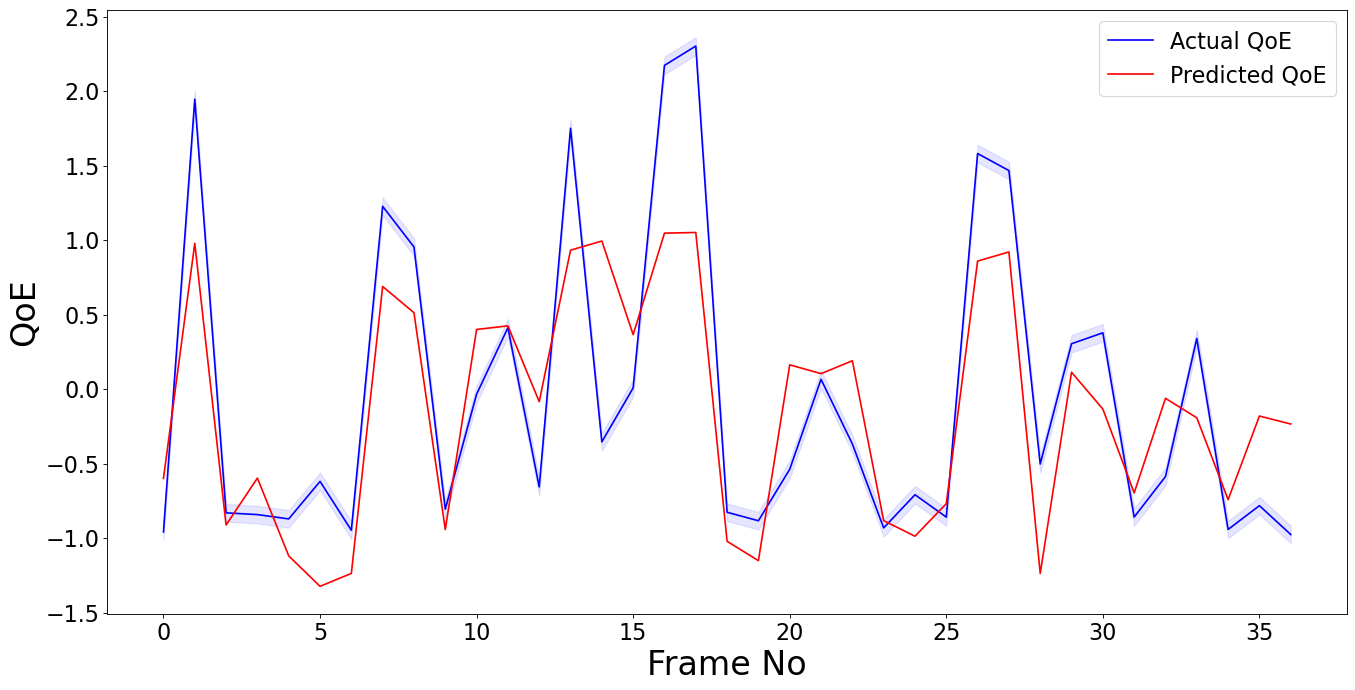

In [15]:
plot_ci(target, pred)

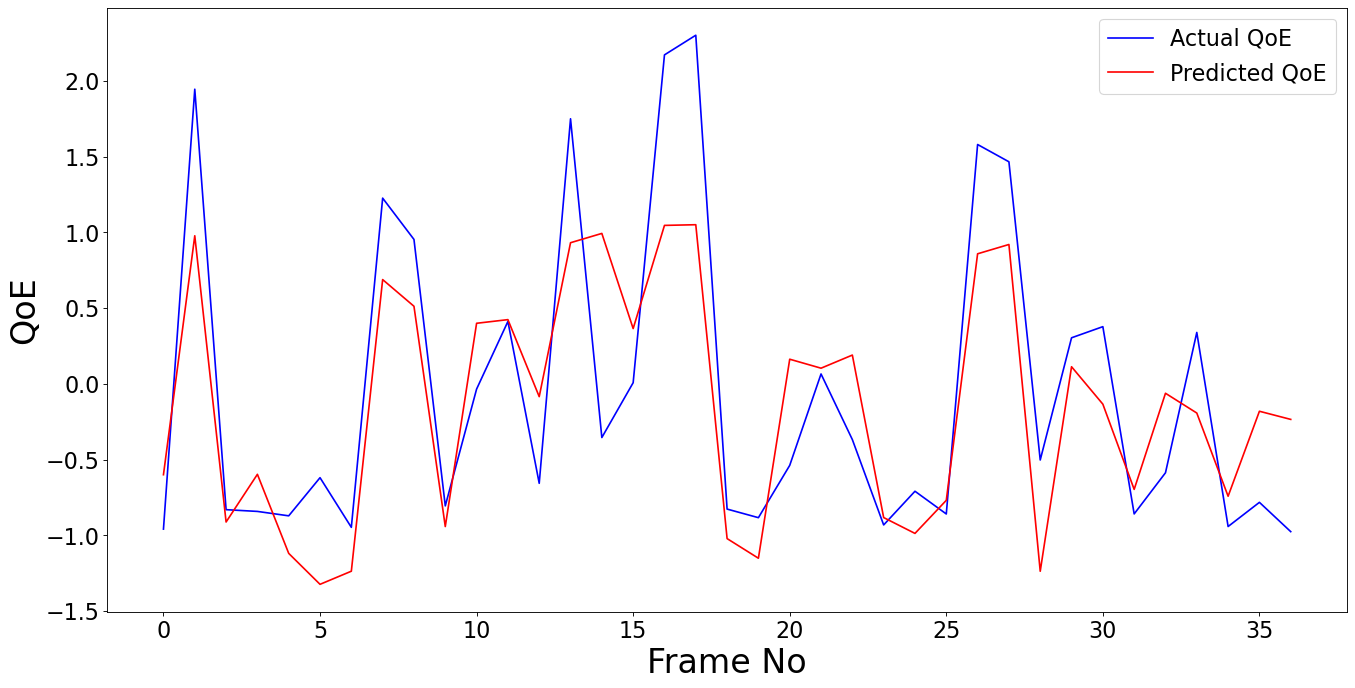

In [16]:
plot_ci_shift(target, pred)

In [17]:


from scipy import stats

confidence = 0.95
squared_errors = (pred - target) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))



array([0.43823536, 0.69311204])

In [18]:
FileLinks('.')

./
  nflx qoe.png
  flicker.png
  __notebook__.ipynb
  nflx qoe ci shift.png
  geekyfile

In [19]:
fold = 4

In [20]:
ts = []
ps = []

for fold in range(5):
    high = 0
    plcc = 0
    srocc = 0
    t = ''
    p = ''
    with open(f'../input/tyr-fork-cc-lstm-ver-4/geekyfile_{fold}', 'rb') as f:
        prediction_dataset = pickle.load(f)
    for i in range(1, len(prediction_dataset)+1):
        target = prediction_dataset[i]['target']
        pred = prediction_dataset[i]['preds']


        if  (pearsonr(target, pred)[0])**0.5+ (spearmanr(target, pred)[0])**0.5 > high:
            high =  (pearsonr(target, pred)[0])**0.5+ (spearmanr(target, pred)[0])**0.5
            plcc = pearsonr(target, pred)[0]
            srocc = spearmanr(target, pred)[0]
            t = target
            p = pred
            
#             print(i,  spearmanr(target, pred)[0], pearsonr(target, pred)[0])
    ts.append(t)
    ps.append(p)
    print(i,  spearmanr(t, p)[0], pearsonr(t, p)[0])

100 0.79800853485064 0.8275044559901059
100 0.8003793266951161 0.7709884481536843
100 0.8162636320531057 0.7935417575153985
100 0.8074917022285442 0.8531390799371456
100 0.762934362934363 0.7538063506708438


In [21]:
def concate_(ts):
    a = list(ts[0]);b = list(ts[1]);
    c = list(ts[2]);d = list(ts[3]);
    e = list(ts[4]);
    nn = []
    l_min = min(len(a), min(len(b), min(len(c), min(len(d), len(e)))))
    l_min = 0
    for i in range(l_min):
        nn.append(a[i]);nn.append(b[i])
        nn.append(c[i]);nn.append(d[i])
        nn.append(e[i])
    nn = list(nn) + list(a[l_min:]);nn = list(nn) + list(b[l_min:])
    nn = list(nn) + list(c[l_min:]);nn = list(nn) + list(d[l_min:])
    nn = list(nn) + list(e[l_min:])
    return nn;


target = concate_(ts)
pred = concate_(ps)


In [22]:
len(target)

184

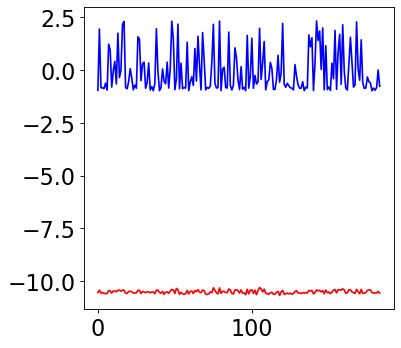

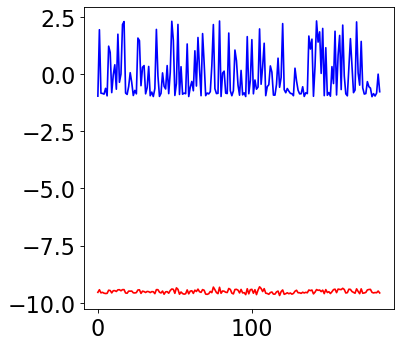

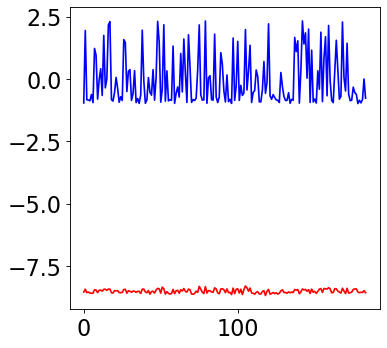

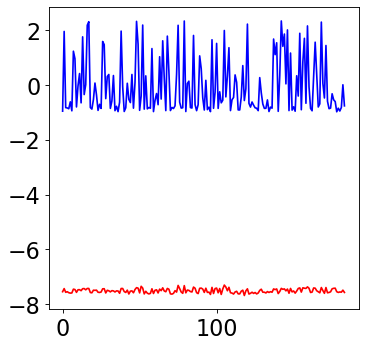

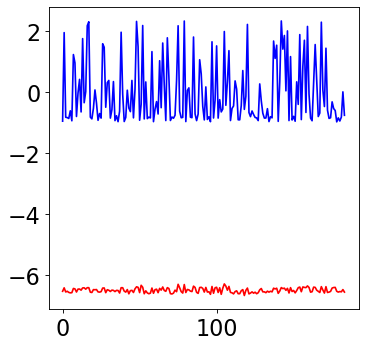

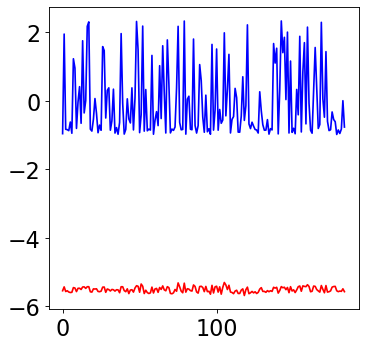

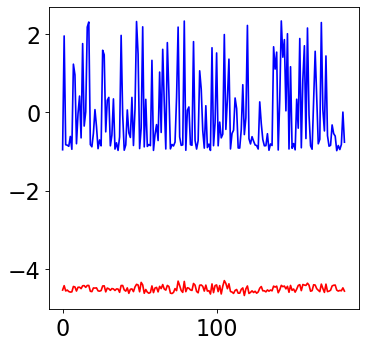

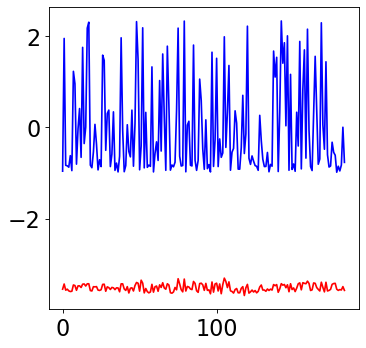

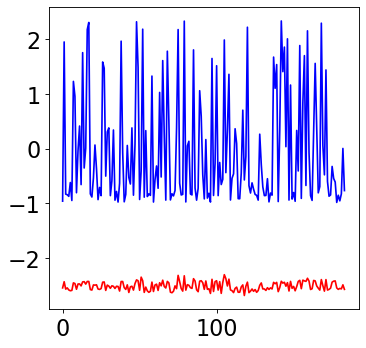

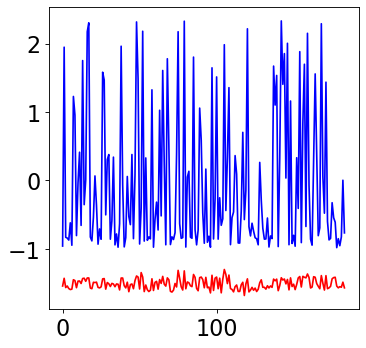

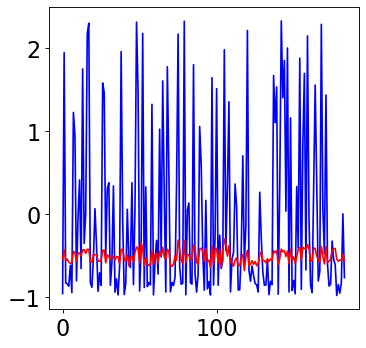

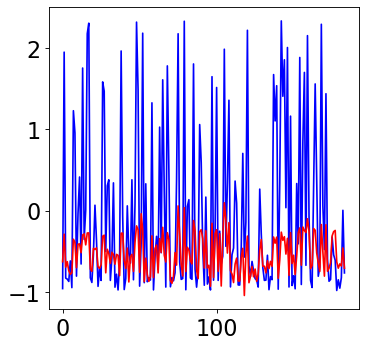

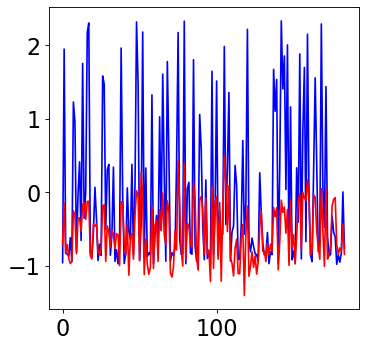

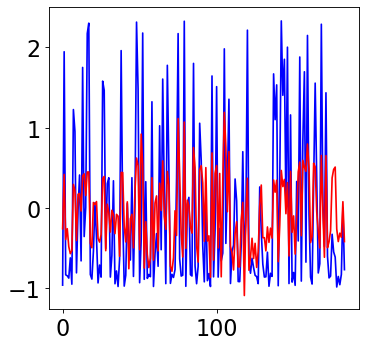

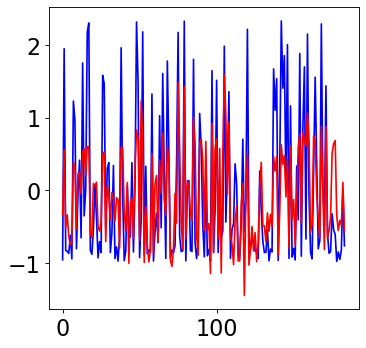

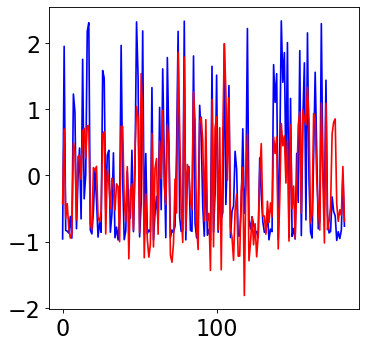

In [23]:
t = np.array(target)
p = np.array(pred)
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse  = 1e100
for j in range(1, 100):
    for i in range(-10, 10):
        t_ = t
        p_ = p*j+i
        if rmse > mean_absolute_error(t_, p_):
            rmse = mean_absolute_error(t_, p_)
            target = t_
            pred = p_
            m = j
            a = i
            plot(t_, p_)

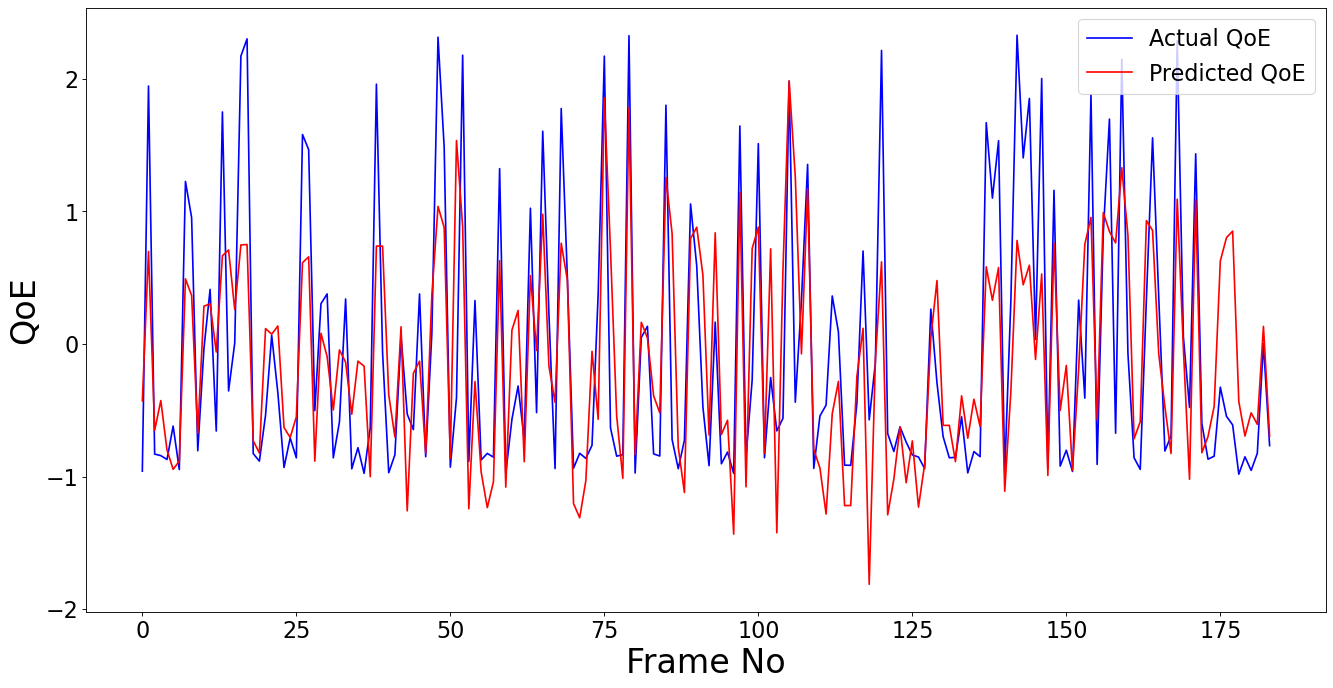

In [24]:
plot_ci_shift(target, pred)

0.6949679998615731


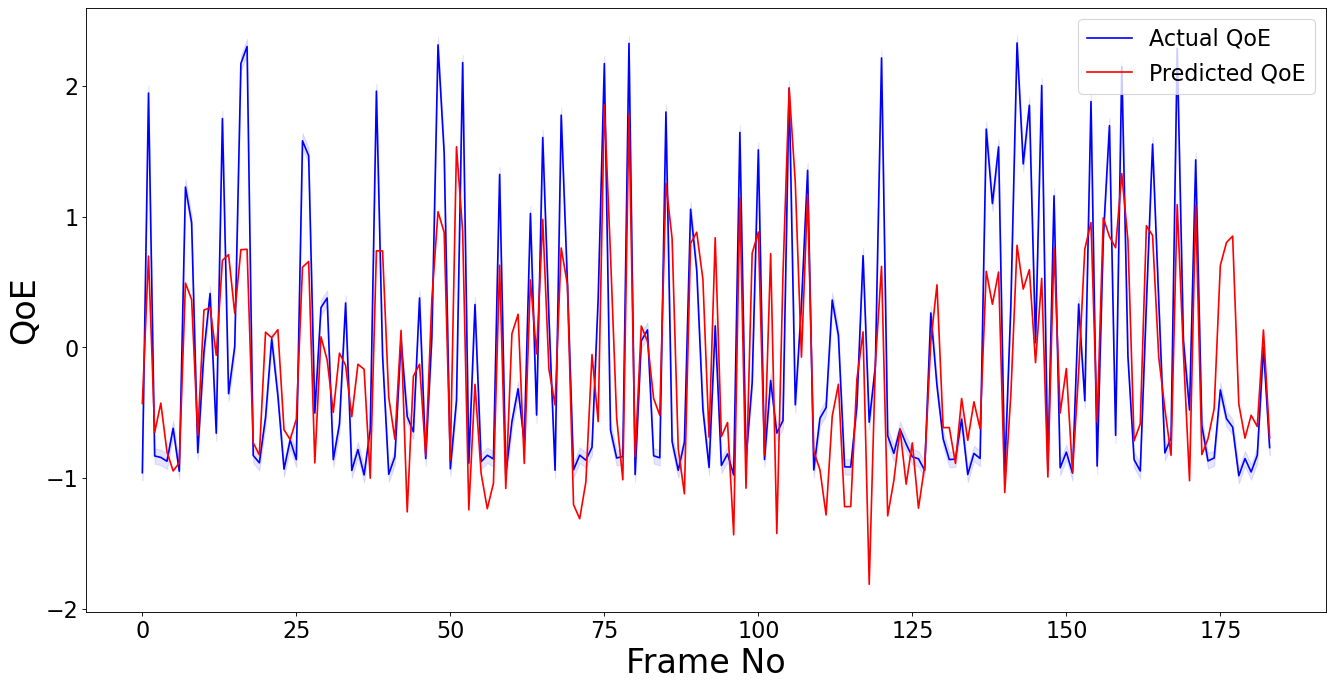

In [25]:
plot_ci(target, pred)

# Stack

In [26]:
all_stack = pd.DataFrame()

In [27]:


tss = []
pss = []

for fold in range(5):
    ts = []
    ps = []
    
    high = 0
    plcc = 0
    srocc = 0
    t = ''
    p = ''
    with open(f'../input/tyr-fork-cc-lstm-ver-4/geekyfile_{fold}', 'rb') as f:
        prediction_dataset = pickle.load(f)
    for i in range(len(prediction_dataset), 0, -1):
        target = prediction_dataset[i]['target']
        pred = prediction_dataset[i]['preds']


        if  (pearsonr(target, pred)[0])+ (spearmanr(target, pred)[0])> 0.75*2:
            high =  (pearsonr(target, pred)[0])**0.5+ (spearmanr(target, pred)[0])**0.5
            
            plcc = pearsonr(target, pred)[0]
            srocc = spearmanr(target, pred)[0]
            t = target
            p = pred
            ts.append(t)
            ps.append(p)
            
    print(len(ts))
    tss.append(ts)
    pss.append(ps)

13
26
22
70
1


In [28]:
len(tss[0])

13

In [29]:
for i in range(8):
    ts = list([tss[0][i], tss[1][i], tss[2][i], tss[3][i], tss[4][i]])
    ps = list([pss[0][i], pss[1][i], pss[2][i], pss[3][i], pss[4][i]])
    t = concate_(ts)
    p = concate_(ps)
    #     print((pearsonr(t, p)[0]),(spearmanr(t, p)[0]))
    break
stack = pd.DataFrame(index=range(len(t)))
for i in range(8):
    ts = list([tss[0][i], tss[1][i], tss[2][i], tss[3][i], tss[4][0]])
    ps = list([pss[0][i], pss[1][i], pss[2][i], pss[3][i], tss[4][0]])
    t = concate_(ts)
    p = concate_(ps)
    stack['target'] = t
    stack[f'{i}'] = p
    
all_stack = pd.concat([all_stack, stack], axis=0)
all_stack


target         0         1         2         3         4         5  \
0   -0.805737 -0.586394 -0.584183 -0.482921 -0.542845 -0.390027 -0.468790   
1   -0.931594 -0.595747 -0.502750 -0.529936 -0.430115 -0.577026 -0.579968   
2   -0.941908 -0.528909 -0.565821 -0.563269 -0.565154 -0.545464 -0.536119   
3   -0.947377 -0.473319 -0.474364 -0.498125 -0.542658 -0.550703 -0.436426   
4   -0.830691 -0.584990 -0.579303 -0.525090 -0.579954 -0.455409 -0.500669   
..        ...       ...       ...       ...       ...       ...       ...   
179 -0.851110 -0.851110 -0.851110 -0.851110 -0.851110 -0.851110 -0.851110   
180 -0.953648 -0.953648 -0.953648 -0.953648 -0.953648 -0.953648 -0.953648   
181 -0.825495 -0.825495 -0.825495 -0.825495 -0.825495 -0.825495 -0.825495   
182  0.002955  0.002955  0.002955  0.002955  0.002955  0.002955  0.002955   
183 -0.766556 -0.766556 -0.766556 -0.766556 -0.766556 -0.766556 -0.766556   

            6         7  
0   -0.465555 -0.591421  
1   -0.526480 -0.585458  
2   -0.468917 -0.567519  
3   -0.503478 -0.596747  
4   -0.522154 -0.572100  
..        ...       ...  
179 -0.851110 -0.851110  
180 -0.953648 -0.953648  
181 -0.825495 -0.825495  
182  0.002955  0.002955  
183 -0.766556 -0.766556  

[184 rows x 9 columns]

In [30]:
from lightgbm import LGBMRegressor

In [31]:
from sklearn.model_selection import KFold


In [32]:
from sklearn.model_selection import KFold
seed, folds = 2021, len(stack)
target = stack['target']
train = stack.drop('target', axis=1)


act = []
pred = []

skf = KFold(n_splits=folds)
for fold, (idt,idv) in enumerate(tqdm(skf.split(stack))):
    
    mtrain, mvalid = train.iloc[idt, :], train.iloc[idv, :]
    ltrain, lvalid = target[idt], target[idv]
    
    model = LGBMRegressor()
    model.fit(mtrain, ltrain)
    
    p = model.predict(mvalid)
    act.append(np.array(lvalid)[0])
    pred.append(np.array(p)[0])
    

|          | 0/? [00:00<?, ?it/s]

In [33]:
print((pearsonr(act, pred)[0]),(spearmanr(act, pred)[0]))

0.7837020413679069 0.7715882132572904


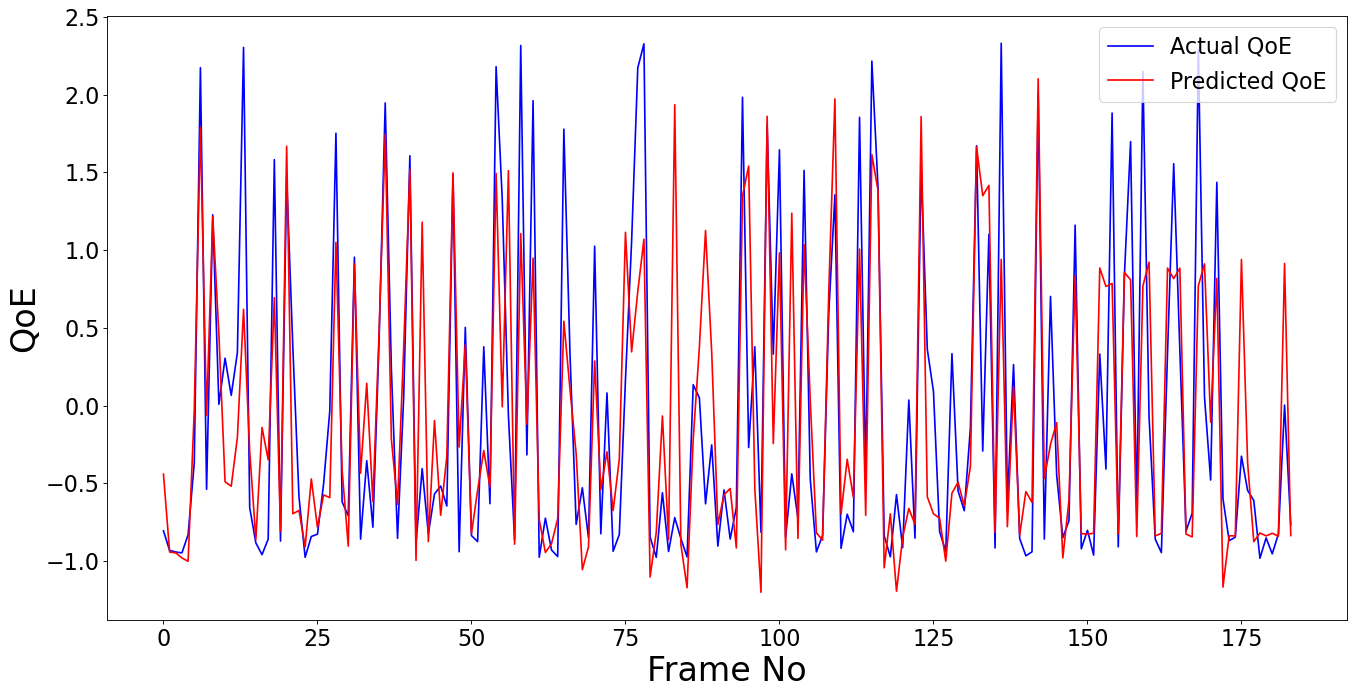

In [34]:
plot_ci_shift(act, pred)

0.6577202424011183


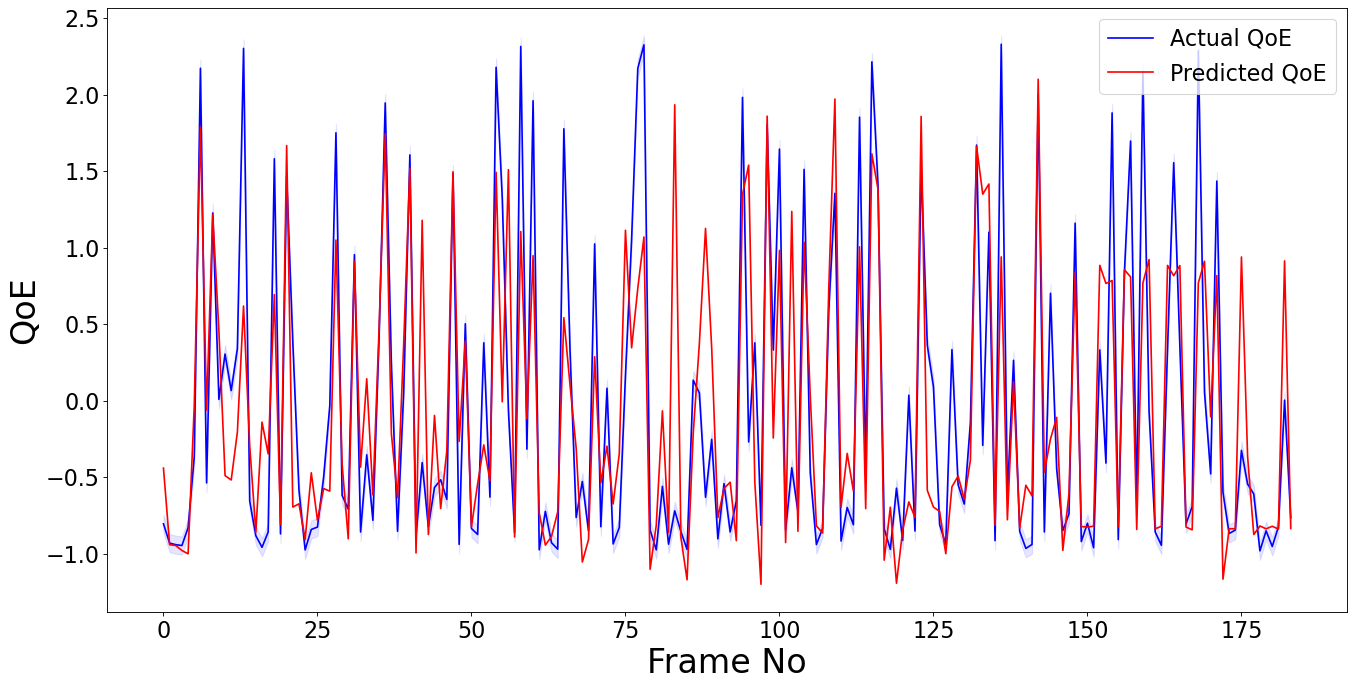

In [35]:
plot_ci(target, pred)

In [36]:
print((pearsonr(act, pred)[0]),(spearmanr(act, pred)[0]))

0.7837020413679069 0.7715882132572904


# All training points

In [37]:
ts = []
ps = []

for fold in range(5):
    high = 0
    plcc = 0
    srocc = 0
    t = ''
    p = ''
    with open(f'../input/tyr-fork-cc-lstm-ver-4/geekyfile_200_400_{fold}', 'rb') as f:
        prediction_dataset = pickle.load(f)
    for i in range(1, len(prediction_dataset)+1):
        target = prediction_dataset[i]['target']
        pred = prediction_dataset[i]['preds']


        if  (pearsonr(target, pred)[0])**0.5+ (spearmanr(target, pred)[0])**0.5 > high:
            high =  (pearsonr(target, pred)[0])**0.5+ (spearmanr(target, pred)[0])**0.5
            plcc = pearsonr(target, pred)[0]
            srocc = spearmanr(target, pred)[0]
            t = target
            p = pred
            
#             print(i,  spearmanr(target, pred)[0], pearsonr(target, pred)[0])
    ts.append(t)
    ps.append(p)


In [38]:
target = concate_(ts)
pred = concate_(ps)


In [39]:
len(target)

168

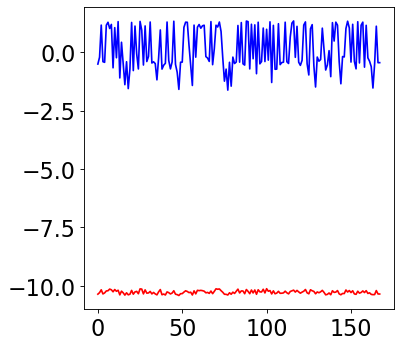

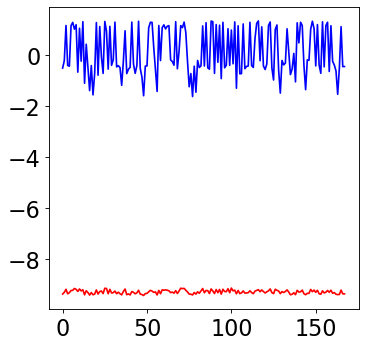

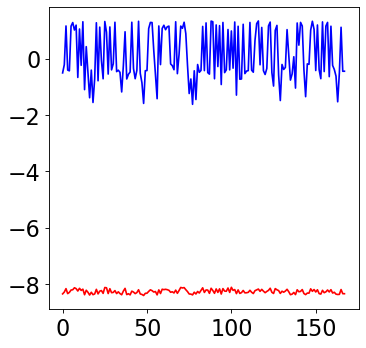

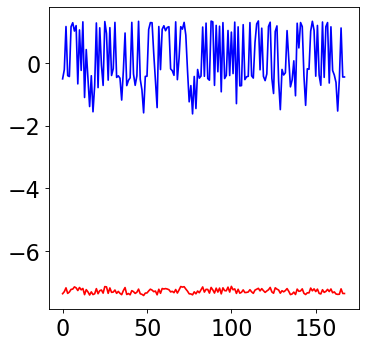

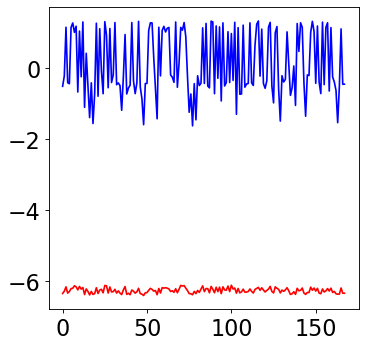

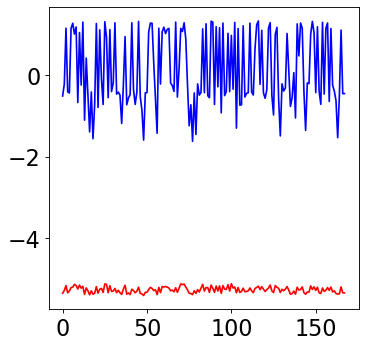

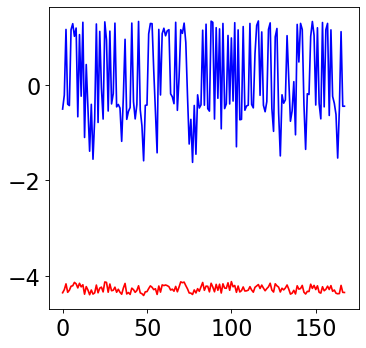

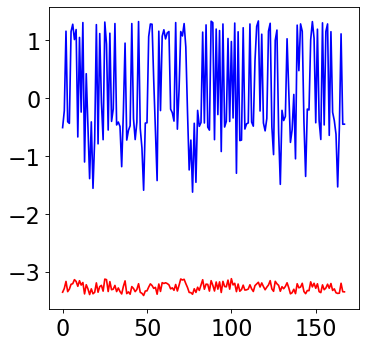

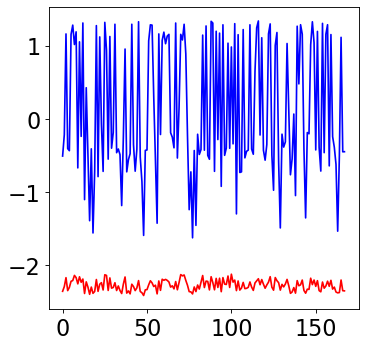

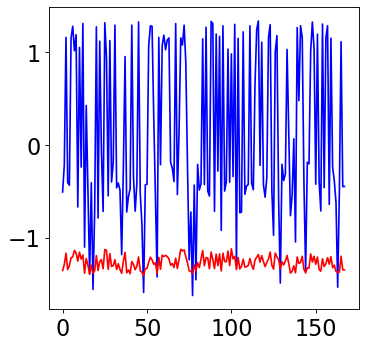

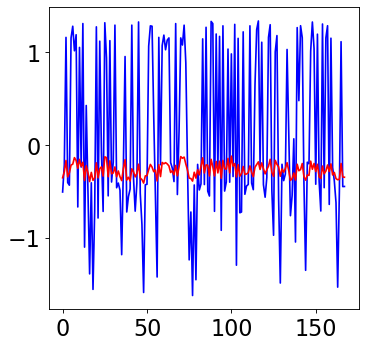

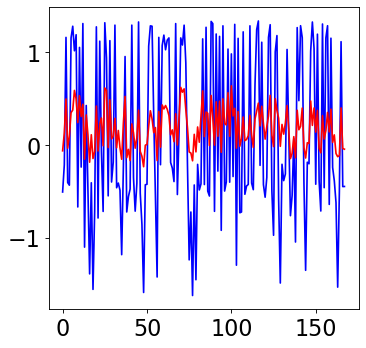

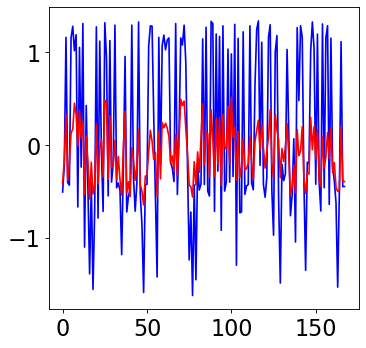

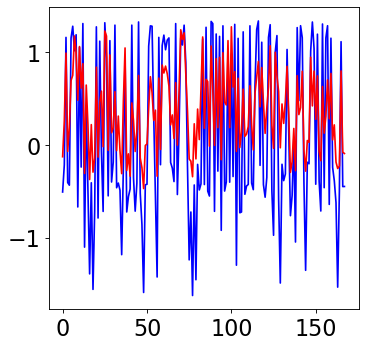

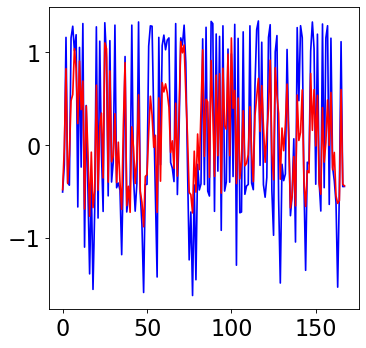

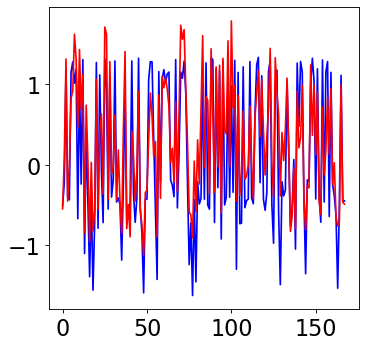

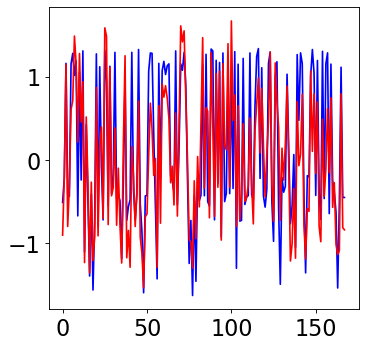

In [40]:
t = np.array(target)
p = np.array(pred)
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse  = 1e100
for j in range(1, 100):
    for i in range(-10, 10):
        t_ = t
        p_ = p*j+i
        if rmse > mean_absolute_error(t_, p_):
            rmse = mean_absolute_error(t_, p_)
            target = t_
            pred = p_
            m = j
            a = i
            plot(t_, p_)

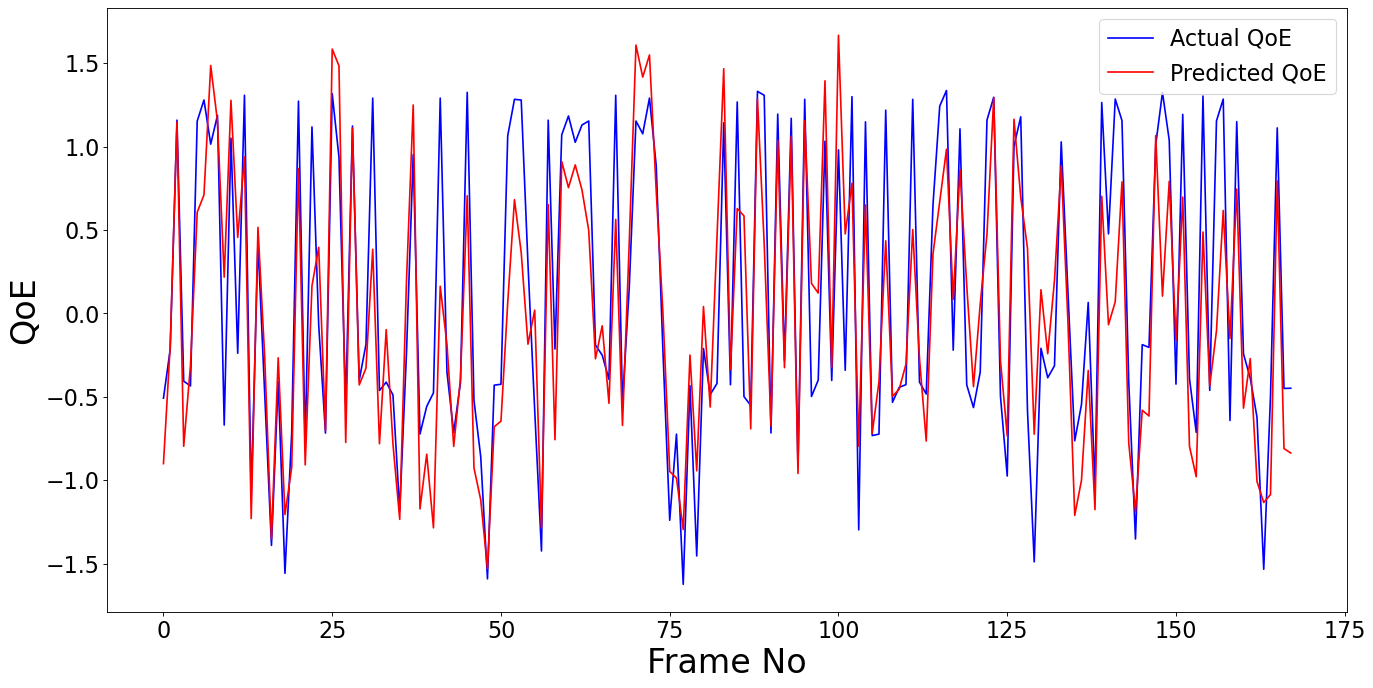

In [41]:
plot_ci_shift(target, pred)

0.5230615339723664


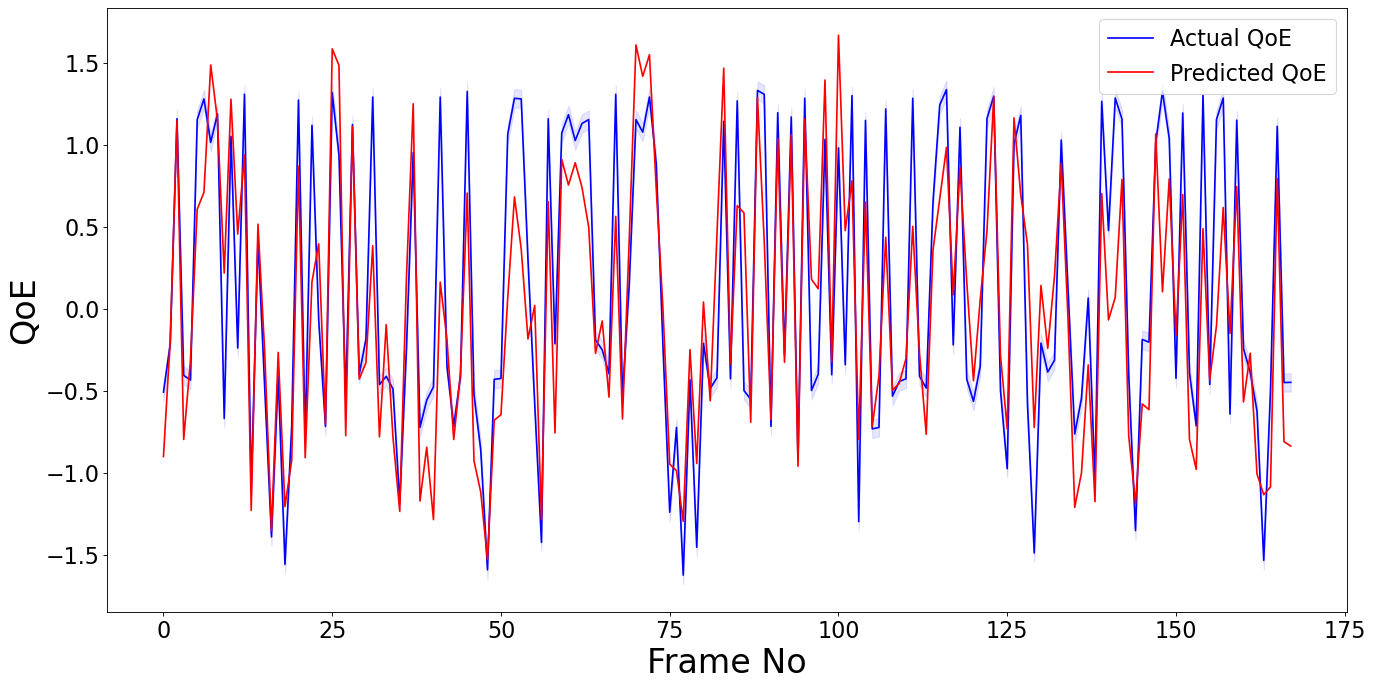

In [42]:
plot_ci(target, pred)


In [43]:
tss = []
pss = []

for fold in range(5):
    ts = []
    ps = []
    
    high = 0
    plcc = 0
    srocc = 0
    t = ''
    p = ''
    with open(f'../input/tyr-fork-cc-lstm-ver-4/geekyfile_200_400_{fold}', 'rb') as f:
        prediction_dataset = pickle.load(f)
    for i in range(len(prediction_dataset), 0, -1):
        target = prediction_dataset[i]['target']
        pred = prediction_dataset[i]['preds']


        if  (pearsonr(target, pred)[0])+ (spearmanr(target, pred)[0])> 0.835*2:
            high =  (pearsonr(target, pred)[0])**0.5+ (spearmanr(target, pred)[0])**0.5
            
            plcc = pearsonr(target, pred)[0]
            srocc = spearmanr(target, pred)[0]
            t = target
            p = pred
            ts.append(t)
            ps.append(p)
            
    print(len(ts))
    tss.append(ts)
    pss.append(ps)


26
94
8
33
28


In [44]:
len(tss[2])

8

In [45]:
for i in range(8):
    ts = list([tss[0][i], tss[1][i], tss[2][i], tss[3][i], tss[4][i]])
    ps = list([pss[0][i], pss[1][i], pss[2][i], pss[3][i], pss[4][i]])
    t = concate_(ts)
    p = concate_(ps)
    #     print((pearsonr(t, p)[0]),(spearmanr(t, p)[0]))
    break
stack = pd.DataFrame(index=range(len(t)))
for i in range(8):
    ts = list([tss[0][i], tss[1][i], tss[2][i], tss[3][i], tss[4][i]])
    ps = list([pss[0][i], pss[1][i], pss[2][i], pss[3][i], tss[4][i]])
    t = concate_(ts)
    p = concate_(ps)
    stack['target'] = t
    stack[f'{i}'] = p
    
all_stack = pd.concat([all_stack, stack], axis=0)
all_stack


target         0         1         2         3         4         5  \
0   -0.805737 -0.586394 -0.584183 -0.482921 -0.542845 -0.390027 -0.468790   
1   -0.931594 -0.595747 -0.502750 -0.529936 -0.430115 -0.577026 -0.579968   
2   -0.941908 -0.528909 -0.565821 -0.563269 -0.565154 -0.545464 -0.536119   
3   -0.947377 -0.473319 -0.474364 -0.498125 -0.542658 -0.550703 -0.436426   
4   -0.830691 -0.584990 -0.579303 -0.525090 -0.579954 -0.455409 -0.500669   
..        ...       ...       ...       ...       ...       ...       ...   
163 -1.533998 -0.203690  1.325330 -0.407732 -1.047499  0.065658  1.156312   
164 -0.499735 -0.763693  1.011642  1.193674 -0.387260 -0.461375 -0.448624   
165  1.112641 -0.713414  1.264617  1.150274  1.150274 -0.387260 -0.423956   
166 -0.449888 -0.390787 -1.352534 -1.352534  0.065658 -0.203690 -0.242719   
167 -0.448624  0.065658 -0.641796 -0.423956  1.264617  1.150274  0.065658   

            6         7  
0   -0.465555 -0.591421  
1   -0.526480 -0.585458  
2   -0.468917 -0.567519  
3   -0.503478 -0.596747  
4   -0.522154 -0.572100  
..        ...       ...  
163  1.264617 -1.533998  
164 -1.533998 -0.499735  
165 -0.713414  1.112641  
166  1.154453 -0.449888  
167  1.039136 -0.448624  

[352 rows x 9 columns]

# 400 600

In [46]:
ts = []
ps = []

for fold in range(5):
    high = 0
    plcc = 0
    srocc = 0
    t = ''
    p = ''
    with open(f'../input/tyr-fork-cc-lstm-ver-4/geekyfile_400_600_{fold}', 'rb') as f:
        prediction_dataset = pickle.load(f)
    for i in range(1, len(prediction_dataset)+1):
        target = prediction_dataset[i]['target']
        pred = prediction_dataset[i]['preds']


        if  (pearsonr(target, pred)[0])**0.5+ (spearmanr(target, pred)[0])**0.5 > high:
            high =  (pearsonr(target, pred)[0])**0.5+ (spearmanr(target, pred)[0])**0.5
            plcc = pearsonr(target, pred)[0]
            srocc = spearmanr(target, pred)[0]
            t = target
            p = pred
            
#             print(i,  spearmanr(target, pred)[0], pearsonr(target, pred)[0])
    ts.append(t)
    ps.append(p)


In [47]:

target = concate_(ts)
pred = concate_(ps)


In [48]:
len(target)

168

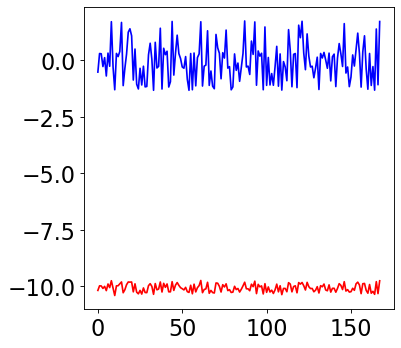

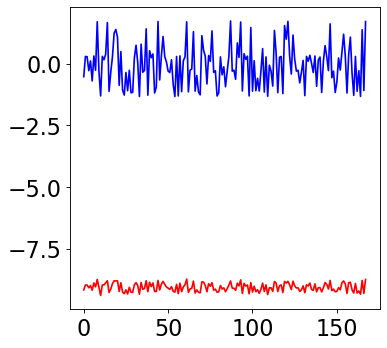

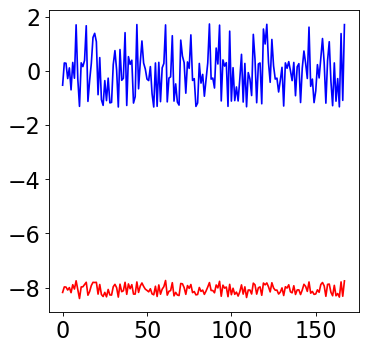

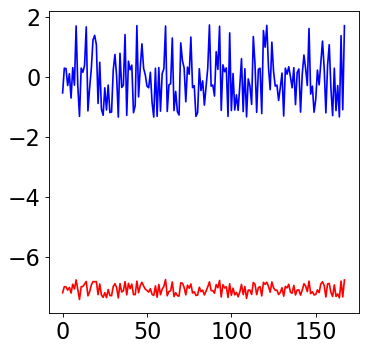

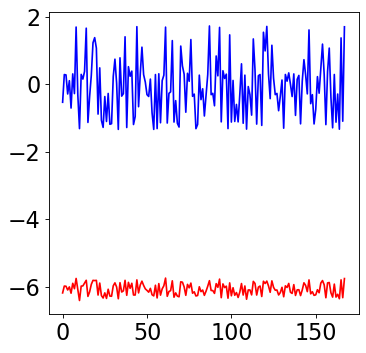

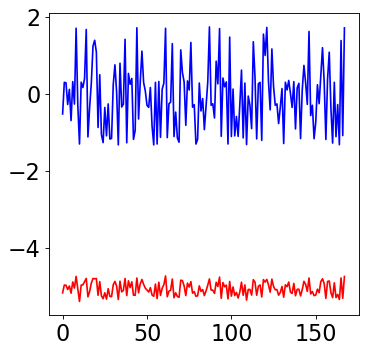

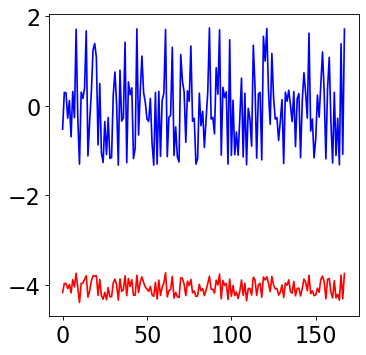

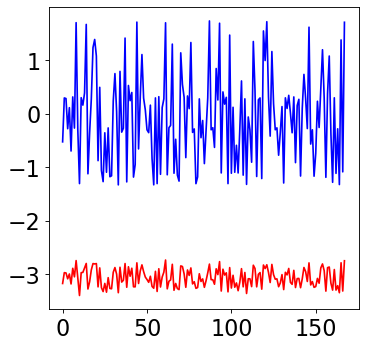

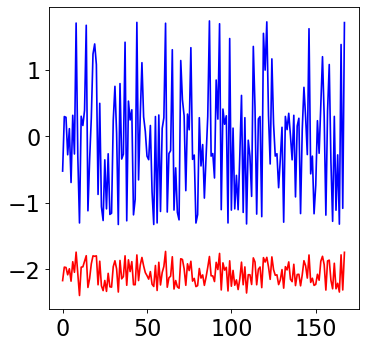

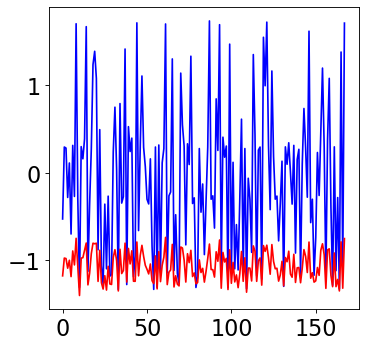

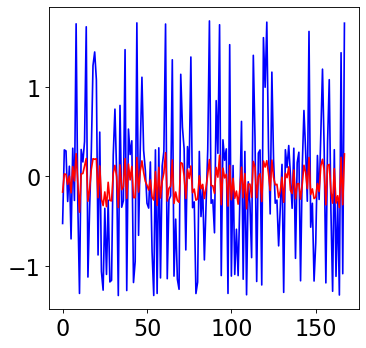

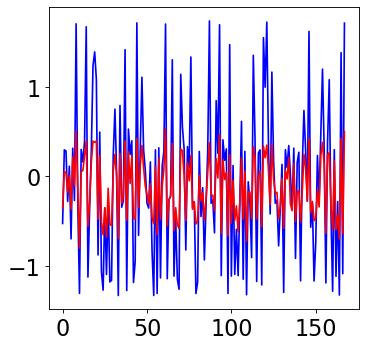

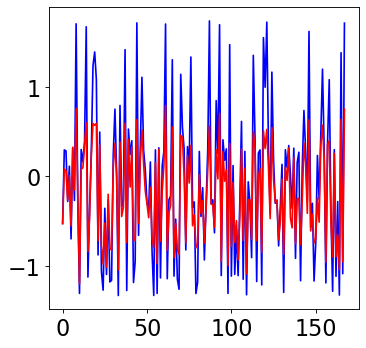

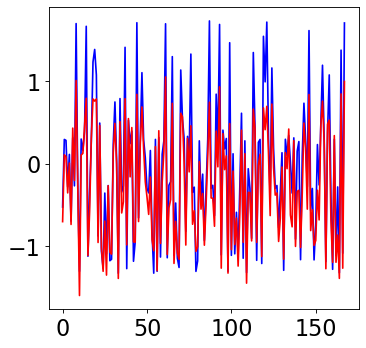

In [49]:
t = np.array(target)
p = np.array(pred)
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse  = 1e100
for j in range(1, 100):
    for i in range(-10, 10):
        t_ = t
        p_ = p*j+i
        if rmse > mean_absolute_error(t_, p_):
            rmse = mean_absolute_error(t_, p_)
            target = t_
            pred = p_
            m = j
            a = i
            plot(t_, p_)

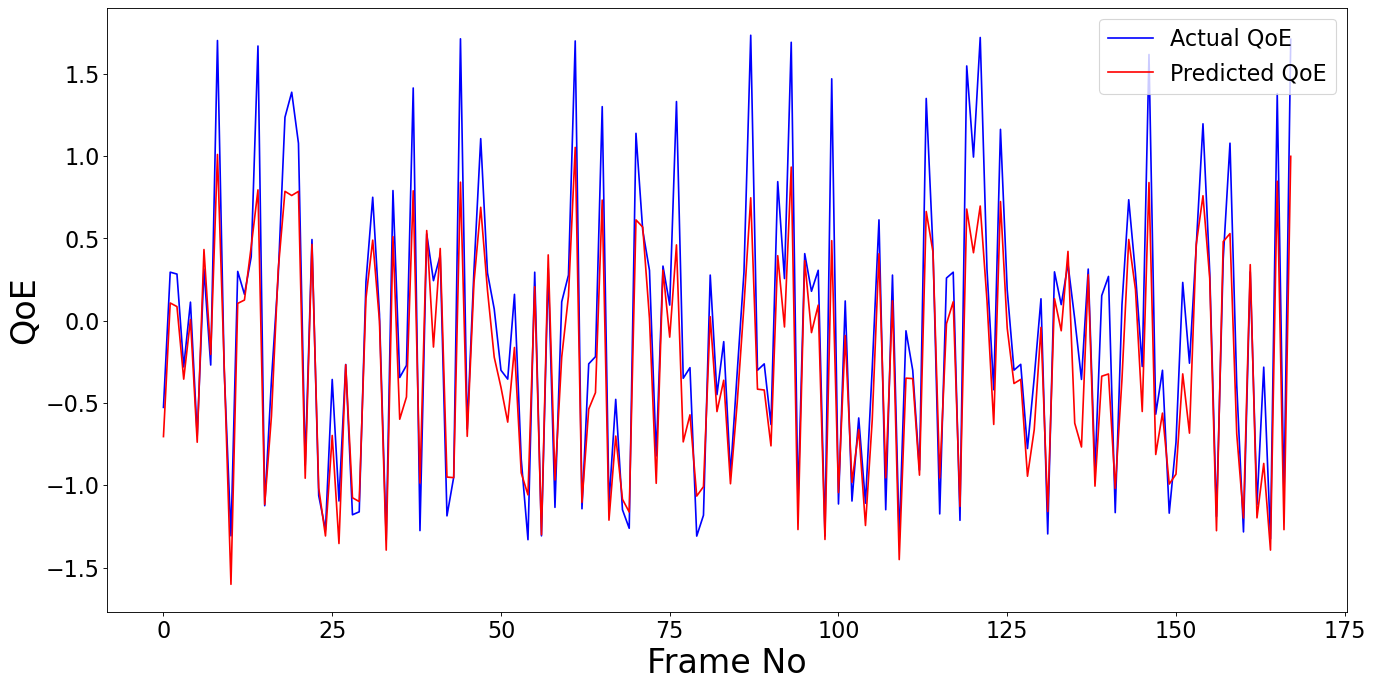

In [50]:
plot_ci_shift(target, pred)

0.26924216085322983


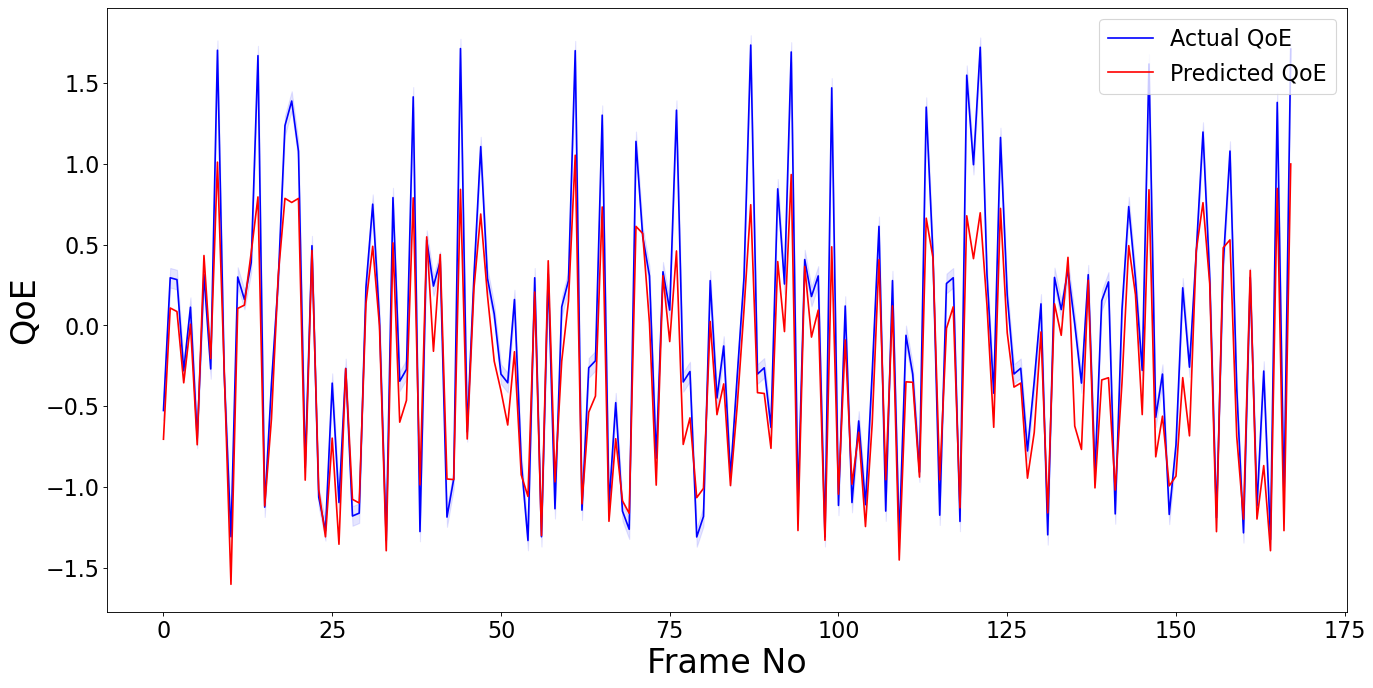

In [51]:
plot_ci(target, pred)

In [52]:
tss = []
pss = []

for fold in range(5):
    ts = []
    ps = []
    
    high = 0
    plcc = 0
    srocc = 0
    t = ''
    p = ''
    with open(f'../input/tyr-fork-cc-lstm-ver-4/geekyfile_400_600_{fold}', 'rb') as f:
        prediction_dataset = pickle.load(f)
    for i in range(len(prediction_dataset), 0, -1):
        target = prediction_dataset[i]['target']
        pred = prediction_dataset[i]['preds']


        if  (pearsonr(target, pred)[0])+ (spearmanr(target, pred)[0])> 0.9655*2:
            high =  (pearsonr(target, pred)[0])**0.5+ (spearmanr(target, pred)[0])**0.5
            
            plcc = pearsonr(target, pred)[0]
            srocc = spearmanr(target, pred)[0]
            t = target
            p = pred
            ts.append(t)
            ps.append(p)
            
    print(len(ts))
    tss.append(ts)
    pss.append(ps)


8
77
54
63
32


In [53]:
len(tss[0])

8

In [54]:
for i in range(8):
    ts = list([tss[0][i], tss[1][i], tss[2][i], tss[3][i], tss[4][i]])
    ps = list([pss[0][i], pss[1][i], pss[2][i], pss[3][i], pss[4][i]])
    t = concate_(ts)
    p = concate_(ps)
    #     print((pearsonr(t, p)[0]),(spearmanr(t, p)[0]))
    break
stack = pd.DataFrame(index=range(len(t)))
for i in range(8):
    ts = list([tss[0][i], tss[1][i], tss[2][i], tss[3][i], tss[4][i]])
    ps = list([pss[0][i], pss[1][i], pss[2][i], pss[3][i], tss[4][i]])
    t = concate_(ts)
    p = concate_(ps)
    stack['target'] = t
    stack[f'{i}'] = p
    
all_stack = pd.concat([all_stack, stack], axis=0)
all_stack


target         0         1         2         3         4         5  \
0   -0.805737 -0.586394 -0.584183 -0.482921 -0.542845 -0.390027 -0.468790   
1   -0.931594 -0.595747 -0.502750 -0.529936 -0.430115 -0.577026 -0.579968   
2   -0.941908 -0.528909 -0.565821 -0.563269 -0.565154 -0.545464 -0.536119   
3   -0.947377 -0.473319 -0.474364 -0.498125 -0.542658 -0.550703 -0.436426   
4   -0.830691 -0.584990 -0.579303 -0.525090 -0.579954 -0.455409 -0.500669   
..        ...       ...       ...       ...       ...       ...       ...   
163 -0.568310 -1.189694  1.078642 -1.283489  1.617175 -0.282425  0.285456   
164  1.196398  0.296598 -1.116641 -1.087266 -0.915765 -1.325298  0.268940   
165 -0.258341  0.377175  0.734917 -0.740013  0.377175  1.379343  0.296598   
166  0.152619  0.734917 -0.282425  1.078642 -0.258341 -1.087266  0.232466   
167 -1.325298 -0.915765  0.296598  0.152619  0.734917  1.709896  0.313741   

            6         7  
0   -0.465555 -0.591421  
1   -0.526480 -0.585458  
2   -0.468917 -0.567519  
3   -0.503478 -0.596747  
4   -0.522154 -0.572100  
..        ...       ...  
163  1.196398 -0.568310  
164 -0.915765  1.196398  
165  0.097658 -0.258341  
166 -0.301257  0.152619  
167  1.617175 -1.325298  

[520 rows x 9 columns]

In [55]:
all_stack

target         0         1         2         3         4         5  \
0   -0.805737 -0.586394 -0.584183 -0.482921 -0.542845 -0.390027 -0.468790   
1   -0.931594 -0.595747 -0.502750 -0.529936 -0.430115 -0.577026 -0.579968   
2   -0.941908 -0.528909 -0.565821 -0.563269 -0.565154 -0.545464 -0.536119   
3   -0.947377 -0.473319 -0.474364 -0.498125 -0.542658 -0.550703 -0.436426   
4   -0.830691 -0.584990 -0.579303 -0.525090 -0.579954 -0.455409 -0.500669   
..        ...       ...       ...       ...       ...       ...       ...   
163 -0.568310 -1.189694  1.078642 -1.283489  1.617175 -0.282425  0.285456   
164  1.196398  0.296598 -1.116641 -1.087266 -0.915765 -1.325298  0.268940   
165 -0.258341  0.377175  0.734917 -0.740013  0.377175  1.379343  0.296598   
166  0.152619  0.734917 -0.282425  1.078642 -0.258341 -1.087266  0.232466   
167 -1.325298 -0.915765  0.296598  0.152619  0.734917  1.709896  0.313741   

            6         7  
0   -0.465555 -0.591421  
1   -0.526480 -0.585458  
2   -0.468917 -0.567519  
3   -0.503478 -0.596747  
4   -0.522154 -0.572100  
..        ...       ...  
163  1.196398 -0.568310  
164 -0.915765  1.196398  
165  0.097658 -0.258341  
166 -0.301257  0.152619  
167  1.617175 -1.325298  

[520 rows x 9 columns]

In [56]:
from sklearn.model_selection import KFold
seed, folds = 2021, len(all_stack)
all_stack.reset_index(drop=True, inplace=True)
target = all_stack['target']
train = all_stack.drop('target', axis=1)


act = []
pred = []

skf = KFold(n_splits=folds)
for fold, (idt,idv) in enumerate(tqdm(skf.split(train))):
    
    mtrain, mvalid = train.iloc[idt, :], train.iloc[idv, :]
    ltrain, lvalid = target[idt], target[idv]
    
    model = LGBMRegressor()
    model.fit(mtrain, ltrain)
    
    p = model.predict(mvalid)
    act.append(np.array(lvalid)[0])
    pred.append(np.array(p)[0])
    

|          | 0/? [00:00<?, ?it/s]

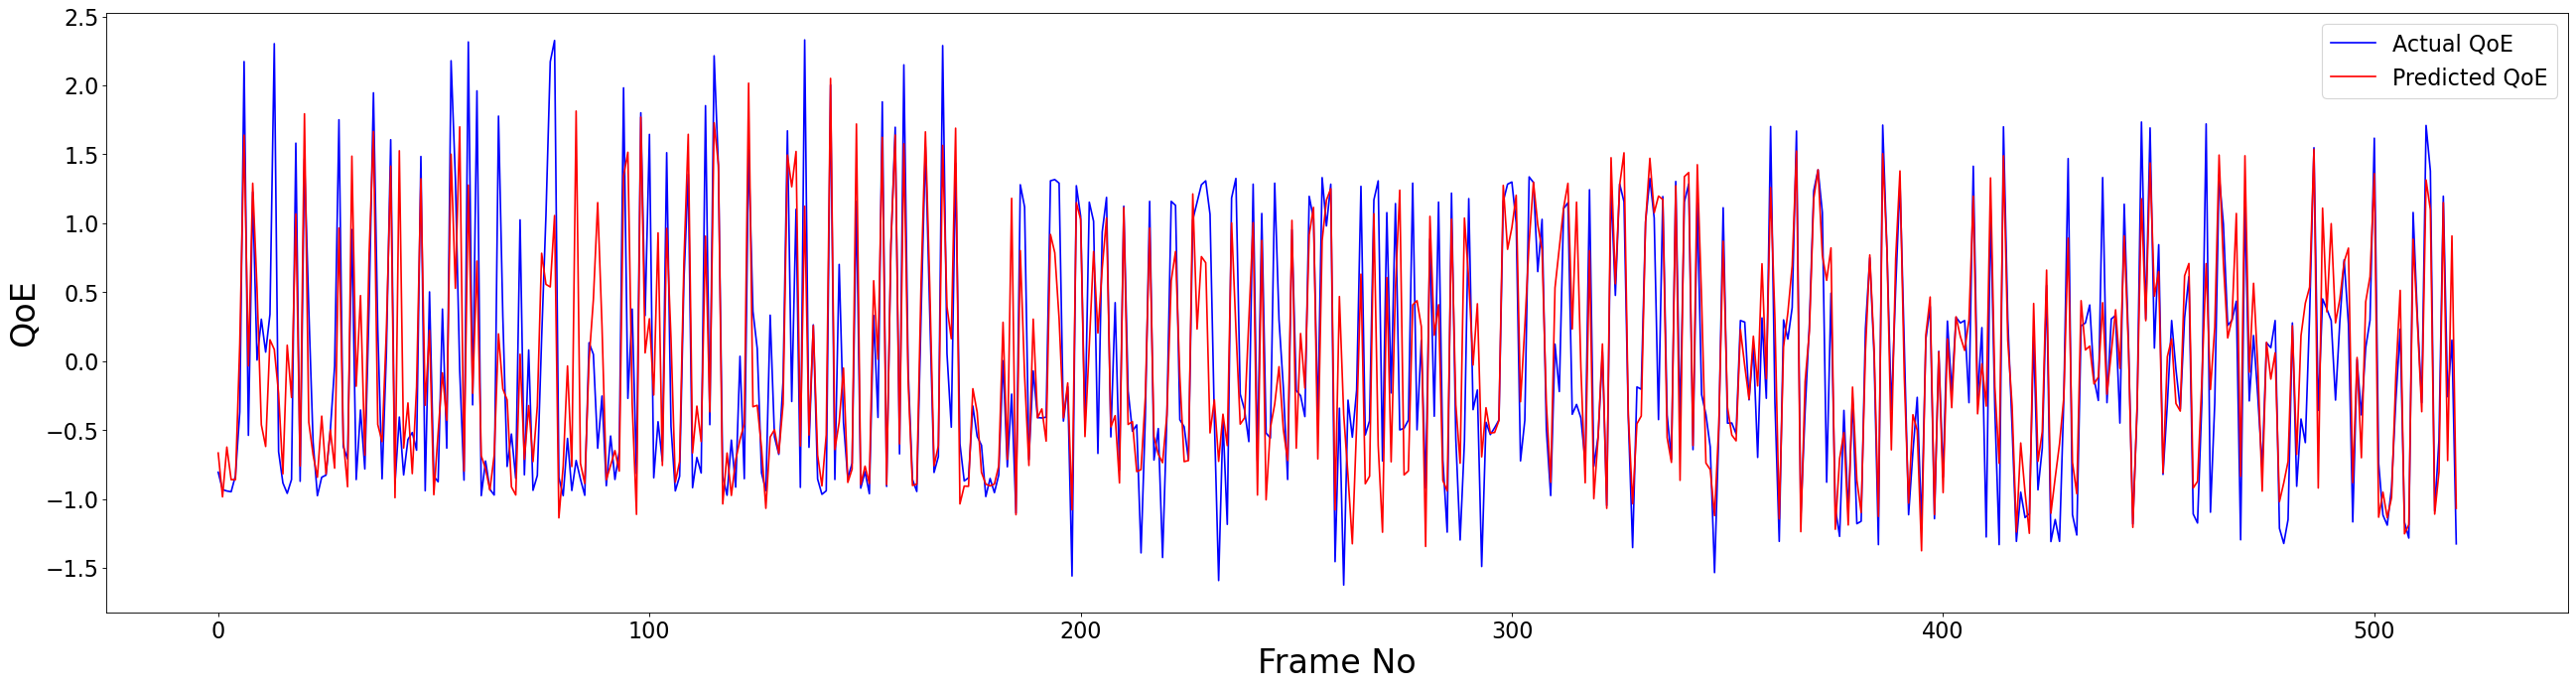

In [57]:
plot_ci_shift(act, pred)

0.5720989457769428


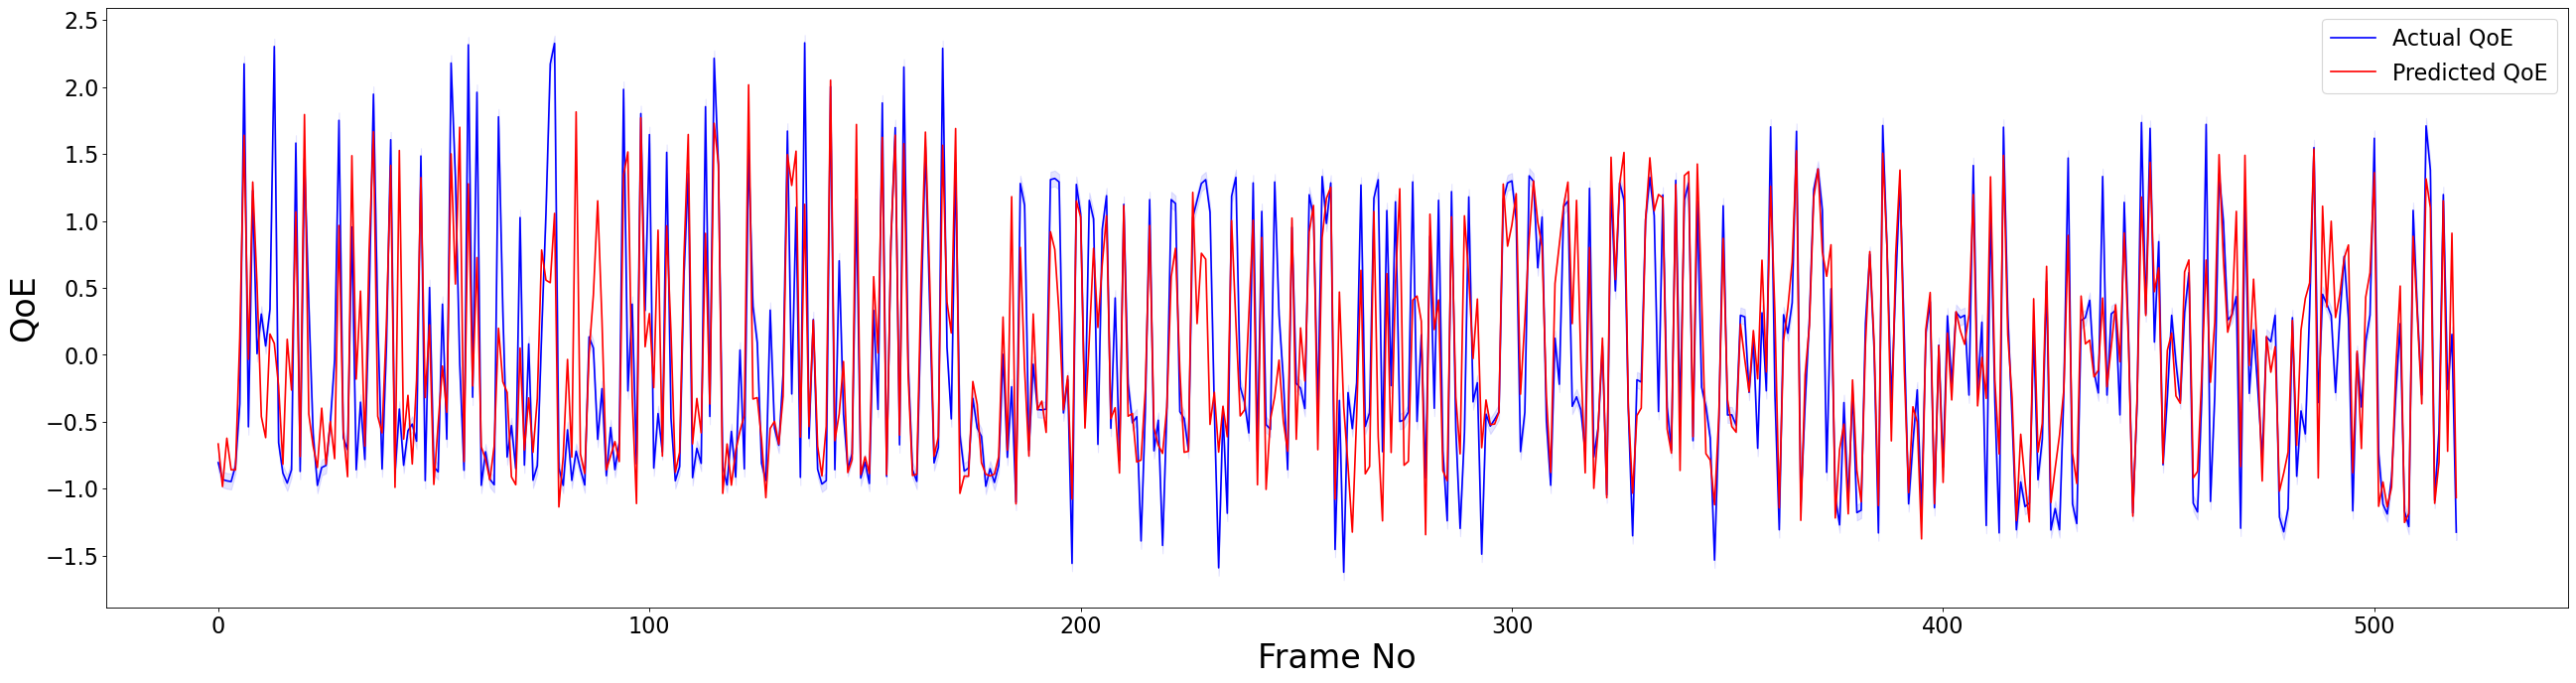

In [58]:
plot_ci(target, pred)

In [59]:
print("plcc : ", (pearsonr(act, pred)[0]),", srocc : ", (spearmanr(act, pred)[0]), ", rmse : ", mean_squared_error(act, pred, squared=False), ", mae : ", mean_absolute_error(act, pred,))

plcc :  0.836351398120455 , srocc :  0.847199061966993 , rmse :  0.5142438548302901 , mae :  0.3490083461253148


# New Plots

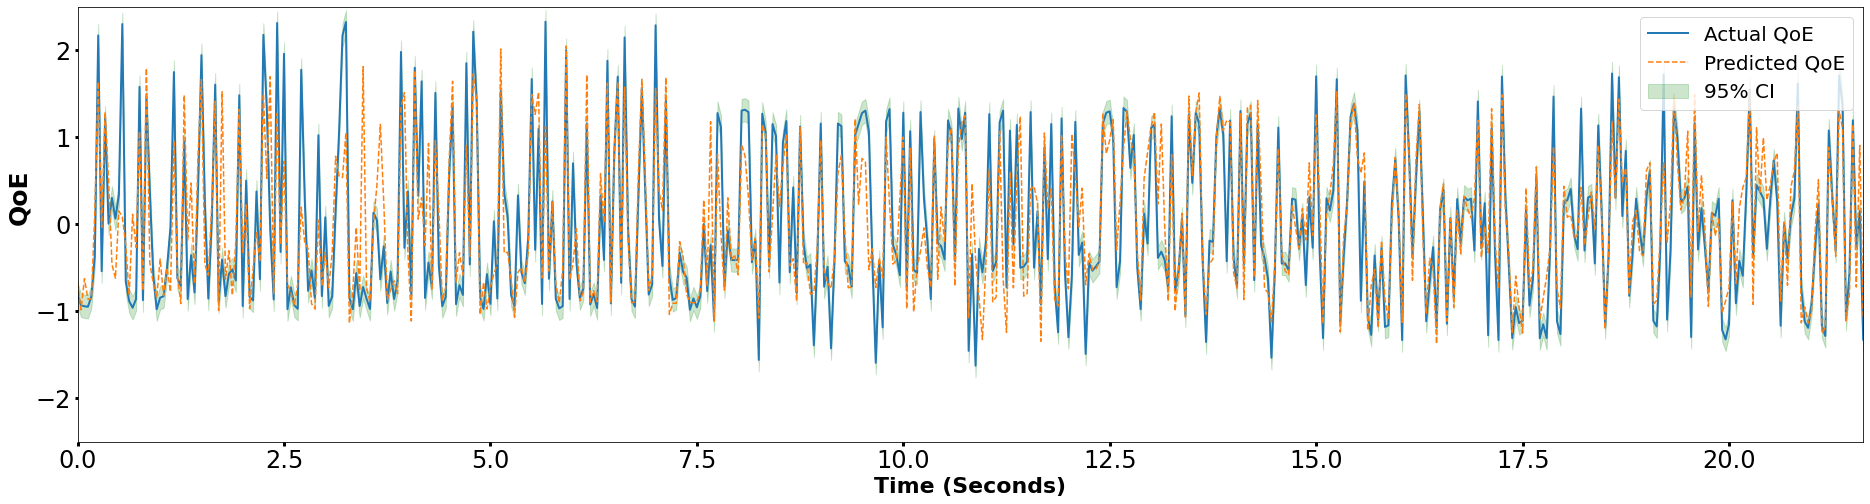

In [60]:
y = target
yhat = pred

from PIL import Image
frame_rate = 24
x = np.array(range(len(target))) / frame_rate
# ci = 0.05 *np.std(y)/np.mean(y)
ci = 0.13378204295179266 # got after rescaling
fig, ax = plt.subplots(1,1,figsize=(8*4,8))
# fig.suptitle('95% Confidence Interval plot of LFOVIA dataset',color='b',size=14,)

y1=yhat
#ax.set_title('95% Confidence Interval plot',size=25,horizontalalignment='center',verticalalignment='bottom',weight = 'bold')
ax.fill_between(x, (y-ci), (y+ci), color='g', alpha=.2, label="95% CI")
ax.plot(x,y,label="Actual QoE",linewidth=2, markersize=12,alpha =5)
ax.plot(x,yhat,'--',label="Predicted QoE")
plt.ylim((-2.5,2.5))
plt.xlim((0,x[-1]))
ax.legend(loc=1,prop={'size': 20})
ax.set_ylabel("QoE",size=25,horizontalalignment='left',weight = 'bold')
ax.set_xlabel("Time (Seconds)",size=22,horizontalalignment='center',weight = 'bold')
plt.tick_params(axis='both', which='major', labelsize=24 , width=3)

# plt.savefig('QoE_CI_4.jpg')
plt.savefig('QoE_CI_4.pdf', bbox_inches='tight')

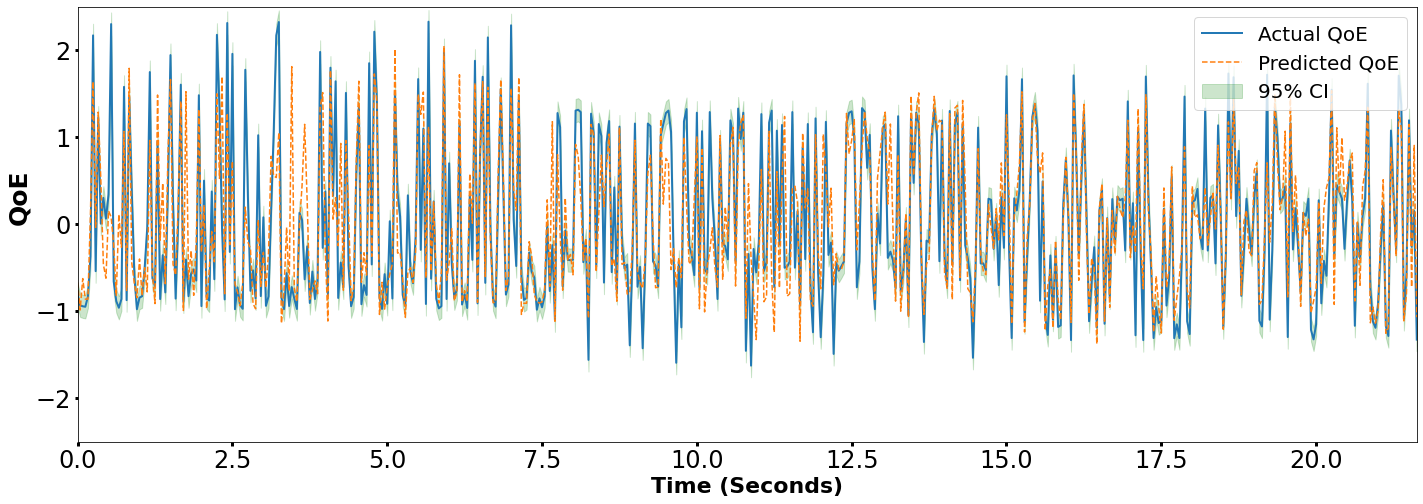

In [61]:
y = target
yhat = pred

from PIL import Image
frame_rate = 24
x = np.array(range(len(target))) / frame_rate
# ci = 0.05 *np.std(y)/np.mean(y)
ci = 0.13378204295179266 # got after rescaling
fig, ax = plt.subplots(1,1,figsize=(8*3,8))
# fig.suptitle('95% Confidence Interval plot of LFOVIA dataset',color='b',size=14,)

y1=yhat
#ax.set_title('95% Confidence Interval plot',size=25,horizontalalignment='center',verticalalignment='bottom',weight = 'bold')
ax.fill_between(x, (y-ci), (y+ci), color='g', alpha=.2, label="95% CI")
ax.plot(x,y,label="Actual QoE",linewidth=2, markersize=12,alpha =5)
ax.plot(x,yhat,'--',label="Predicted QoE")
plt.ylim((-2.5,2.5))
plt.xlim((0,x[-1]))
ax.legend(loc=1,prop={'size': 20})
ax.set_ylabel("QoE",size=25,horizontalalignment='left',weight = 'bold')
ax.set_xlabel("Time (Seconds)",size=22,horizontalalignment='center',weight = 'bold')
plt.tick_params(axis='both', which='major', labelsize=24 , width=3)

# plt.savefig('QoE_CI_3.jpg')
plt.savefig('QoE_CI_3.pdf', bbox_inches='tight')

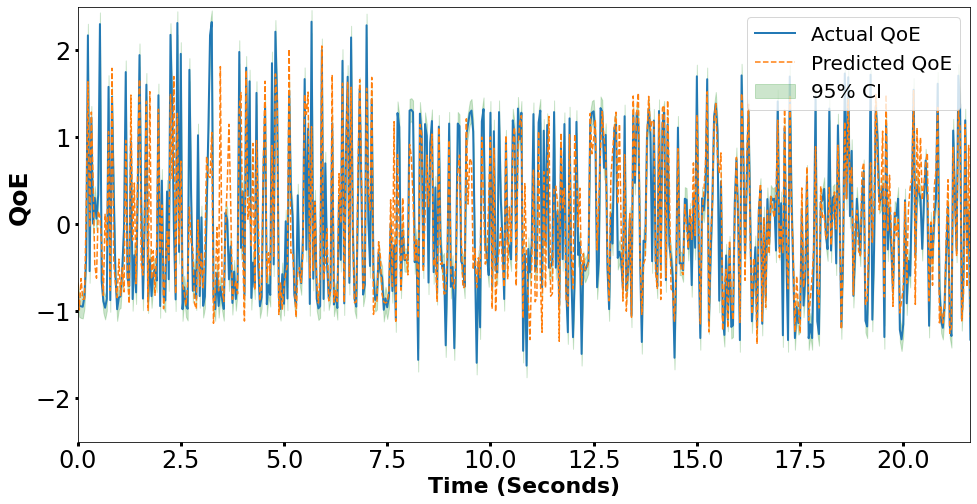

In [62]:
y = target
yhat = pred

from PIL import Image
frame_rate = 24
x = np.array(range(len(target))) / frame_rate
# ci = 0.05 *np.std(y)/np.mean(y)
ci = 0.13378204295179266 # got after rescaling
fig, ax = plt.subplots(1,1,figsize=(8*2,8))
# fig.suptitle('95% Confidence Interval plot of LFOVIA dataset',color='b',size=14,)

y1=yhat
#ax.set_title('95% Confidence Interval plot',size=25,horizontalalignment='center',verticalalignment='bottom',weight = 'bold')
ax.fill_between(x, (y-ci), (y+ci), color='g', alpha=.2, label="95% CI")
ax.plot(x,y,label="Actual QoE",linewidth=2, markersize=12,alpha =5)
ax.plot(x,yhat,'--',label="Predicted QoE")
plt.ylim((-2.5,2.5))
plt.xlim((0,x[-1]))
ax.legend(loc=1,prop={'size': 20})
ax.set_ylabel("QoE",size=25,horizontalalignment='left',weight = 'bold')
ax.set_xlabel("Time (Seconds)",size=22,horizontalalignment='center',weight = 'bold')
plt.tick_params(axis='both', which='major', labelsize=24 , width=3)

# plt.savefig('QoE_CI_2.jpg')
plt.savefig('QoE_CI_2.pdf', bbox_inches='tight')

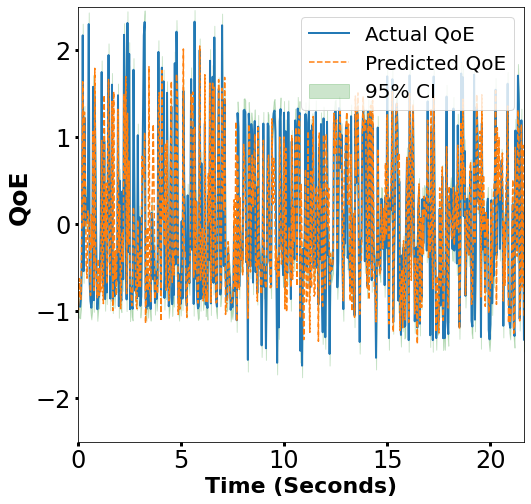

In [63]:
y = target
yhat = pred

from PIL import Image
frame_rate = 24
x = np.array(range(len(target))) / frame_rate
# ci = 0.05 *np.std(y)/np.mean(y)
ci = 0.13378204295179266 # got after rescaling
fig, ax = plt.subplots(1,1,figsize=(8,8))
# fig.suptitle('95% Confidence Interval plot of LFOVIA dataset',color='b',size=14,)

y1=yhat
#ax.set_title('95% Confidence Interval plot',size=25,horizontalalignment='center',verticalalignment='bottom',weight = 'bold')
ax.fill_between(x, (y-ci), (y+ci), color='g', alpha=.2, label="95% CI")
ax.plot(x,y,label="Actual QoE",linewidth=2, markersize=12,alpha =5)
ax.plot(x,yhat,'--',label="Predicted QoE")
plt.ylim((-2.5,2.5))
plt.xlim((0,x[-1]))
ax.legend(loc=1,prop={'size': 20})
ax.set_ylabel("QoE",size=25,horizontalalignment='left',weight = 'bold')
ax.set_xlabel("Time (Seconds)",size=22,horizontalalignment='center',weight = 'bold')
plt.tick_params(axis='both', which='major', labelsize=24 , width=3)

# plt.savefig('QoE_CI_1.jpg')
plt.savefig('QoE_CI_1.pdf', bbox_inches='tight')

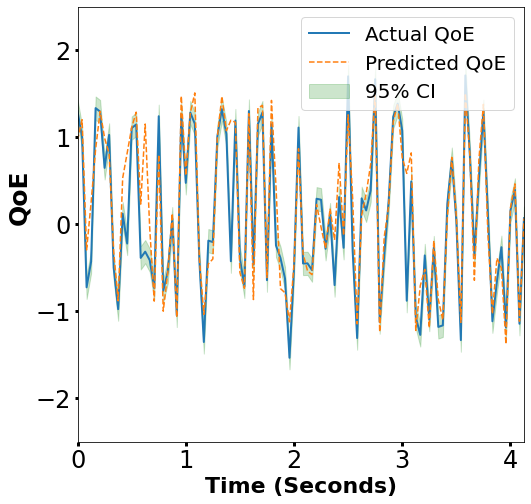

In [64]:
y = target[300:400]
yhat = pred[300:400]

from PIL import Image
frame_rate = 24
x = np.array(range(len(y))) / frame_rate
# ci = 0.05 *np.std(y)/np.mean(y)
ci = 0.13378204295179266 # got after rescaling
fig, ax = plt.subplots(1,1,figsize=(8,8))
# fig.suptitle('95% Confidence Interval plot of LFOVIA dataset',color='b',size=14,)

y1=yhat
#ax.set_title('95% Confidence Interval plot',size=25,horizontalalignment='center',verticalalignment='bottom',weight = 'bold')
ax.fill_between(x, (y-ci), (y+ci), color='g', alpha=.2, label="95% CI")
ax.plot(x,y,label="Actual QoE",linewidth=2, markersize=12,alpha =5)
ax.plot(x,yhat,'--',label="Predicted QoE")
plt.ylim((-2.5,2.5))
plt.xlim((0,x[-1]))
ax.legend(loc=1,prop={'size': 20})
ax.set_ylabel("QoE",size=25,horizontalalignment='left',weight = 'bold')
ax.set_xlabel("Time (Seconds)",size=22,horizontalalignment='center',weight = 'bold')
plt.tick_params(axis='both', which='major', labelsize=24 , width=3)

# plt.savefig('QoE_CI_100_1.jpg')
plt.savefig('QoE_CI_100_1.pdf', bbox_inches='tight')

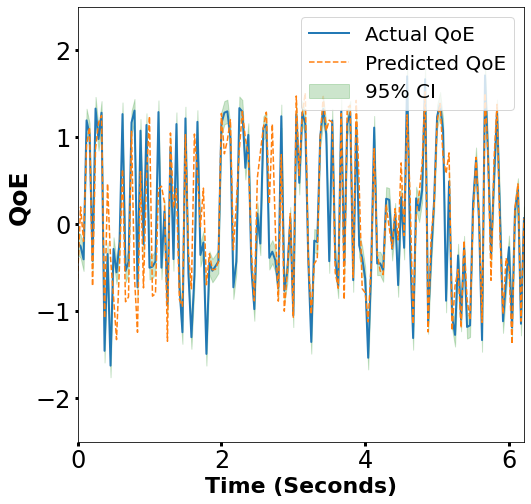

In [65]:
y = target[250:400]
yhat = pred[250:400]

from PIL import Image
frame_rate = 24
x = np.array(range(len(y))) / frame_rate
# ci = 0.05 *np.std(y)/np.mean(y)
ci = 0.13378204295179266 # got after rescaling
fig, ax = plt.subplots(1,1,figsize=(8,8))
# fig.suptitle('95% Confidence Interval plot of LFOVIA dataset',color='b',size=14,)

y1=yhat
#ax.set_title('95% Confidence Interval plot',size=25,horizontalalignment='center',verticalalignment='bottom',weight = 'bold')
ax.fill_between(x, (y-ci), (y+ci), color='g', alpha=.2, label="95% CI")
ax.plot(x,y,label="Actual QoE",linewidth=2, markersize=12,alpha =5)
ax.plot(x,yhat,'--',label="Predicted QoE")
plt.ylim((-2.5,2.5))
plt.xlim((0,x[-1]))
ax.legend(loc=1,prop={'size': 20})
ax.set_ylabel("QoE",size=25,horizontalalignment='left',weight = 'bold')
ax.set_xlabel("Time (Seconds)",size=22,horizontalalignment='center',weight = 'bold')
plt.tick_params(axis='both', which='major', labelsize=24 , width=3)

# plt.savefig('QoE_CI_150_1.jpg')
plt.savefig('QoE_CI_150_1.pdf', bbox_inches='tight')

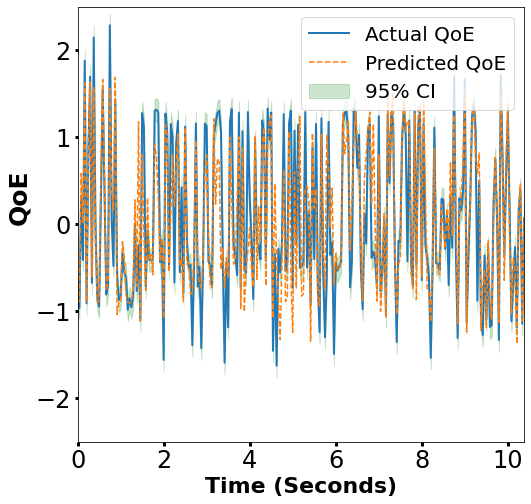

In [66]:
y = target[150:400]
yhat = pred[150:400]

from PIL import Image
frame_rate = 24
x = np.array(range(len(y))) / frame_rate
# ci = 0.05 *np.std(y)/np.mean(y)
ci = 0.13378204295179266 # got after rescaling
fig, ax = plt.subplots(1,1,figsize=(8,8))
# fig.suptitle('95% Confidence Interval plot of LFOVIA dataset',color='b',size=14,)

y1=yhat
#ax.set_title('95% Confidence Interval plot',size=25,horizontalalignment='center',verticalalignment='bottom',weight = 'bold')
ax.fill_between(x, (y-ci), (y+ci), color='g', alpha=.2, label="95% CI")
ax.plot(x,y,label="Actual QoE",linewidth=2, markersize=12,alpha =5)
ax.plot(x,yhat,'--',label="Predicted QoE")
plt.ylim((-2.5,2.5))
plt.xlim((0,x[-1]))
ax.legend(loc=1,prop={'size': 20})
ax.set_ylabel("QoE",size=25,horizontalalignment='left',weight = 'bold')
ax.set_xlabel("Time (Seconds)",size=22,horizontalalignment='center',weight = 'bold')
plt.tick_params(axis='both', which='major', labelsize=24 , width=3)

# plt.savefig('QoE_CI_150_1.jpg')
plt.savefig('QoE_CI_250_1.pdf', bbox_inches='tight')

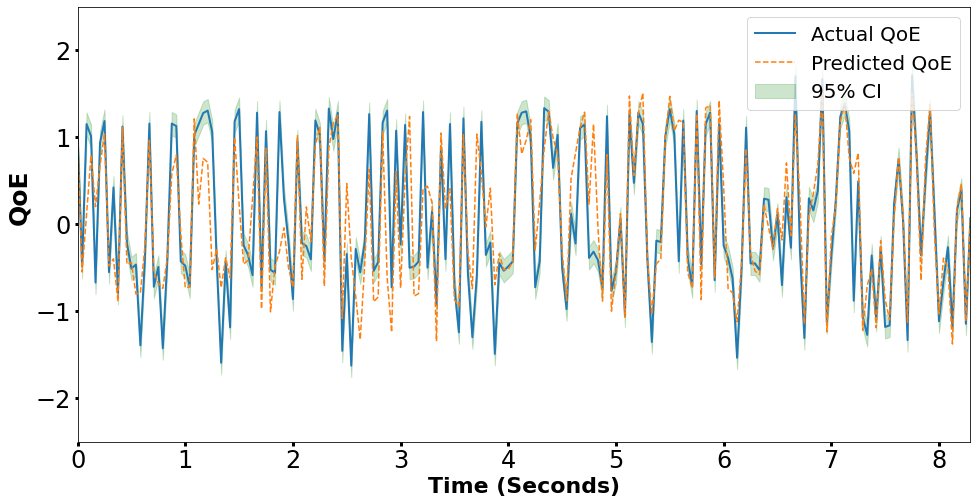

In [67]:
y = target[200:400]
yhat = pred[200:400]

from PIL import Image
frame_rate = 24
x = np.array(range(len(y))) / frame_rate
# ci = 0.05 *np.std(y)/np.mean(y)
ci = 0.13378204295179266 # got after rescaling
fig, ax = plt.subplots(1,1,figsize=(8*2,8))
# fig.suptitle('95% Confidence Interval plot of LFOVIA dataset',color='b',size=14,)

y1=yhat
#ax.set_title('95% Confidence Interval plot',size=25,horizontalalignment='center',verticalalignment='bottom',weight = 'bold')
ax.fill_between(x, (y-ci), (y+ci), color='g', alpha=.2, label="95% CI")
ax.plot(x,y,label="Actual QoE",linewidth=2, markersize=12,alpha =5)
ax.plot(x,yhat,'--',label="Predicted QoE")
plt.ylim((-2.5,2.5))
plt.xlim((0,x[-1]))
ax.legend(loc=1,prop={'size': 20})
ax.set_ylabel("QoE",size=25,horizontalalignment='left',weight = 'bold')
ax.set_xlabel("Time (Seconds)",size=22,horizontalalignment='center',weight = 'bold')
plt.tick_params(axis='both', which='major', labelsize=24 , width=3)

# plt.savefig('QoE_CI_200_2.jpg')
plt.savefig('QoE_CI_200_2.pdf', bbox_inches='tight')

In [68]:
FileLinks('.')

./
  QoE_CI_3.pdf
  QoE_CI_1.pdf
  nflx qoe.png
  QoE_CI_150_1.pdf
  flicker.png
  QoE_CI_250_1.pdf
  QoE_CI_200_2.pdf
  __notebook__.ipynb
  QoE_CI_2.pdf
  QoE_CI_4.pdf
  QoE_CI_100_1.pdf
  nflx qoe ci shift.png
  geekyfile

In [69]:
# #     if i == 'nu_labels':
# #         import pickle
# #         pickle.dump(sc, open('scaler.pkl','wb'))
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc = pickle.load(open('../input/scaler/scaler.pkl','rb'))